#### Liste des tâches à réaliser sur ce Dataset
1 - Analyse Exploratoire
   * Identification de la target
   * Nombre de Lignes et de colonne
   * Identification des valeurs manquantes
   * Type de Variable contenu dans le dataset
   * Visualisation de la cible
   * Compréhension des différentes variables
   * Visualisation des rélations feature/target
   * Identification des Outliers

<strong> Objectif du projet<strong><br/> Le défi de ce projet est de prédire avec précision le futur cours de clôture ajusté de l'ETF sur l'or sur 
une période donnée dans le futur.

#### Importation des différentes librairies necessaire.

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set()

#### Chargement du Dataset

In [2]:
data = pd.read_csv('dataset.csv', na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)

In [3]:
data.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2011-12-15  154.740005  154.949997  151.710007  152.330002  152.330002   
2011-12-16  154.309998  155.369995  153.899994  155.229996  155.229996   
2011-12-19  155.479996  155.860001  154.360001  154.869995  154.869995   
2011-12-20  156.820007  157.429993  156.580002  156.979996  156.979996   
2011-12-21  156.979996  157.529999  156.130005  157.160004  157.160004   

              Volume     SP_open     SP_high      SP_low    SP_close  ...  \
Date                                                                  ...   
2011-12-15  21521900  123.029999  123.199997  121.989998  122.180000  ...   
2011-12-16  18124300  122.230003  122.949997  121.300003  121.589996  ...   
2011-12-19  12547200  122.059998  122.320000  120.029999  120.290001  ...   
2011-12-20   9136300  122.180000  124.139999  120.370003  123.930000  ...   
2011-12-21  11996100  123.930000  124.360001  122.750000  124.169998  ...   

              GDX_Low  GDX_Close  GDX_Adj Close  GDX_Volume   USO_Open  \
Date                                                                     
2011-12-15  51.570000  51.680000      48.973877    20605600  36.900002   
2011-12-16  52.040001  52.680000      49.921513    16285400  36.180000   
2011-12-19  51.029999  51.169998      48.490578    15120200  36.389999   
2011-12-20  52.369999  52.990002      50.215282    11644900  37.299999   
2011-12-21  52.419998  52.959999      50.186852     8724300  37.669998   

             USO_High    USO_Low  USO_Close  USO_Adj Close  USO_Volume  
Date                                                                    
2011-12-15  36.939999  36.049999  36.130001      36.130001    12616700  
2011-12-16  36.500000  35.730000  36.270000      36.270000    12578800  
2011-12-19  36.450001  35.930000  36.200001      36.200001     7418200  
2011-12-20  37.610001  37.220001  37.560001      37.560001    10041600  
2011-12-21  38.240002  37.520000  38.110001      38.110001    10728000  

[5 rows x 80 columns]

In [4]:
df = data.copy()

* Identification de la target

In [5]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SP_open',
       'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume', 'DJ_open',
       'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume', 'EG_open',
       'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume', 'EU_Price',
       'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price', 'OF_Open',
       'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price', 'OS_Open',
       'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open', 'SF_High',
       'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open', 'USB_High',
       'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low',
       'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_High', 'USO

D'après le sujet, la variable cible ou target est : Adj Close.

In [6]:
df['Adj Close'].isna().sum()

0

Le jeux de données contient 0 valeur manquante.

In [7]:
df['Adj Close'].dtype

dtype('float64')

* Determination du nombre de ligne et de colonne du dataset

In [8]:
df.shape

(1718, 80)

In [9]:
nline = df.shape[0]
ncol = df.shape[1]
print(f'Le dataset contient {nline} ligne et {ncol} colonne.')

Le dataset contient 1718 ligne et 80 colonne.


* Determination des données manquantes

In [10]:
df.isnull().values.any()

False

Le dataset ne contient aucune données manquante.

* Les types de variables contenu dans le dataset

In [11]:
df.dtypes.value_counts()

float64    58
int64      22
dtype: int64

Nous avons 2 types de données dans notre dataset a savoir les entiers et les nombres flottant.

* Visualisation de la Variable cible

In [12]:
d = df.drop(['Adj Close'], axis=1)

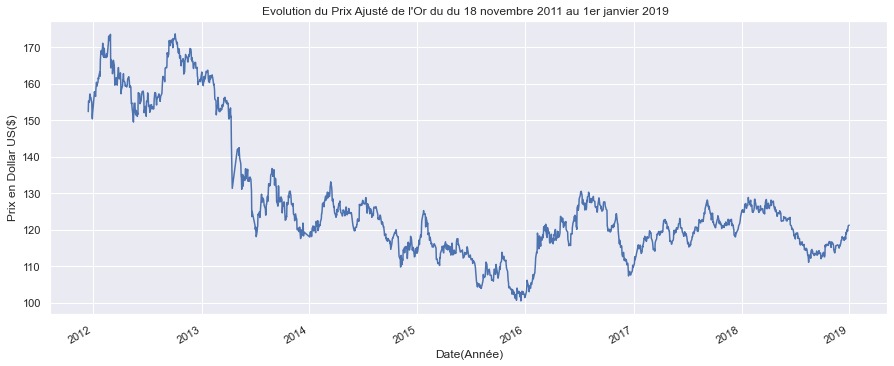

In [13]:
plt.figure(figsize=(15,6))
df['Adj Close'].plot()
plt.xlabel('Date(Année)')
plt.ylabel('Prix en Dollar US($)')
plt.title('Evolution du Prix Ajusté de l\'Or du du 18 novembre 2011 au 1er janvier 2019  ')
#plt.savefig('target.png', dpi=200)
plt.show()

* Commentaire du Graphe de la variable cible <br>
  - Nous constatons une tendance à la baisse des prix ajusté à la fermèture de l'or sur la période (novembre 2011 à janvier 2019)

* Compréhension des différentes variables

* ETF : ETF (Exchange Traded Fund ) ou FNB (fonds négocié en bourse) en français est un type de titre qui suit un indice , un secteur, une marchandise ou un autre actif, mais qui peut être acheté ou vendu en bourse de la même manière qu'une action ordinaire.<br><br>
* Date : La date du jour.<br><br>
* Open : Prix du ETF de l'or a l'ouverture du marché.<br><br>
* High : Prix du ETF de l'or le plus haut de la journée.<br><br>
* Low : Prix du ETF de l'or le plus bas de la journée.<br><br>
* Close : Prix du ETF de l'or à la Clôture  du marché.<br><br>
* Adj Close : Prix adjuté du ETF de l'or à la clôture du marché.<br><br>
* Volume : quantité ou le volume ETF de l'or négocié ce jour.<br><br>
* Indice S&P 500 ou SP : Le S&P 500 est un indice boursier basé sur 500 grandes sociétés      cotées sur les bourses aux États-Unis (NYSE ou NASDAQ). L'indice est possédé et géré par Standard & Poor's, l'une des trois principales sociétés de notation financière.<br><br>
* Indice Dow Jones ou DJ : Le Dow Jones Industrial Average (abrégé en DJIA et souvent raccourci en Dow Jones) est le plus vieil indice des bourses de New York et le plus vieil indice boursier du monde.<br><br>
* Eldorado Gold Corporation (EGO) ou EG : Eldorado Gold Corp est un producteur d'or et de métaux de base basé au Canada avec des opérations d'extraction<br><br>
* EU : Taux de change EURO - USD<br><br>
* OF : Contrats à terme sur le pétrole brut Brent.<br><br>
* OS : Prix du Pétrole brut en USD<br><br>
* SF : Contrats à terme sur l'argent.<br><br>
* USB : Taux des obligations américaines (10 ans).<br><br>
* PLT : Prix du platine.<br><br>
* PLD_trend : Prix du palladium.<br><br>
* RHO_trend : Prix du Rhodium<br><br>
* USDI : Indice du dollar américain.<br><br>
* GDX : ETF des mineurs d'or.<br><br>
* USO : Pétrole ETF.<br><br>

* Visualisation des rélations feature/target

<Figure size 864x432 with 0 Axes>

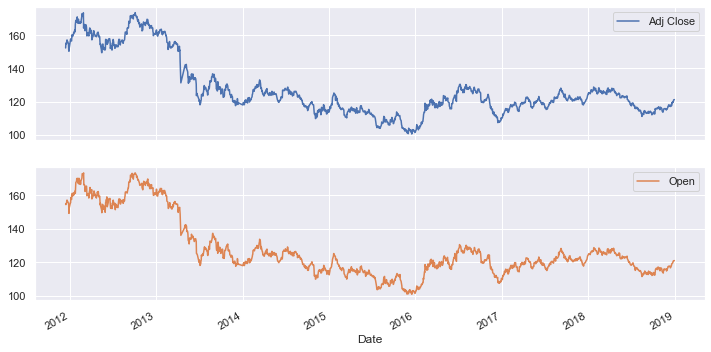

<Figure size 864x432 with 0 Axes>

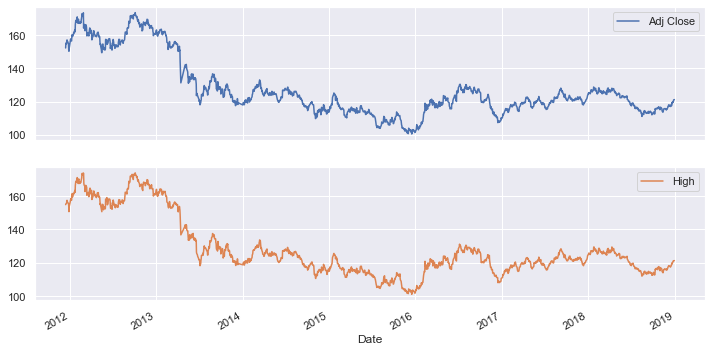

<Figure size 864x432 with 0 Axes>

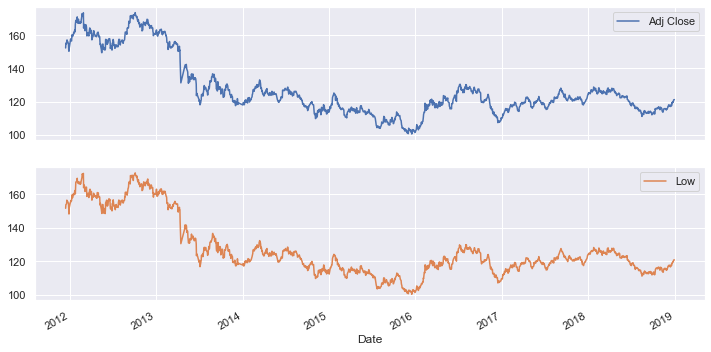

<Figure size 864x432 with 0 Axes>

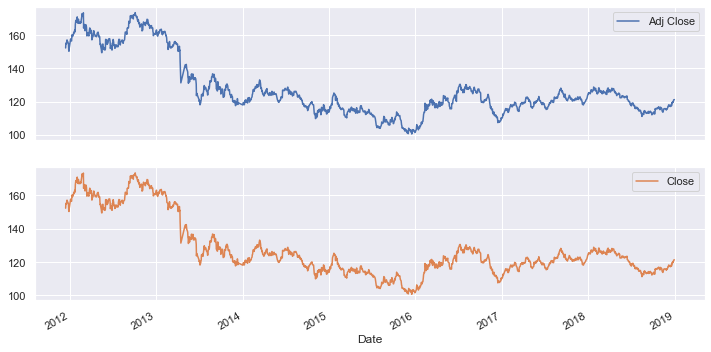

<Figure size 864x432 with 0 Axes>

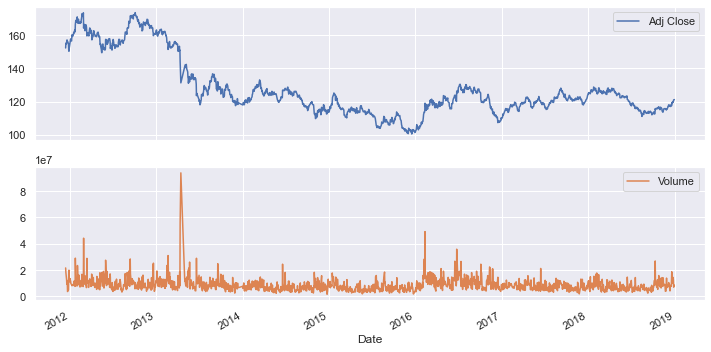

<Figure size 864x432 with 0 Axes>

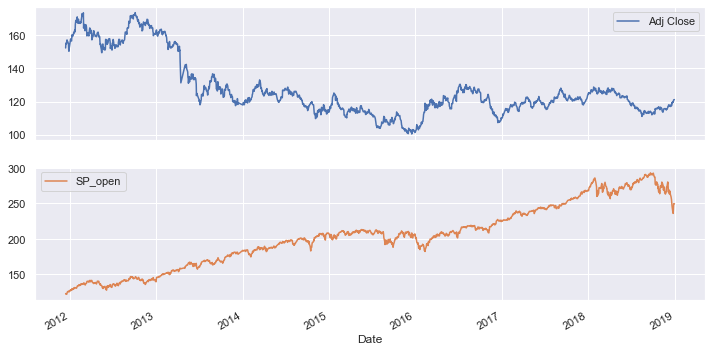

<Figure size 864x432 with 0 Axes>

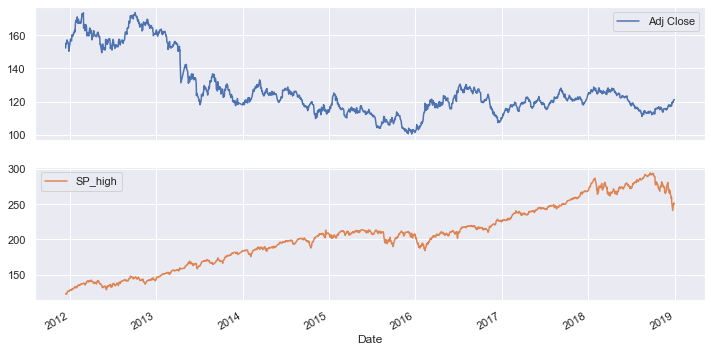

<Figure size 864x432 with 0 Axes>

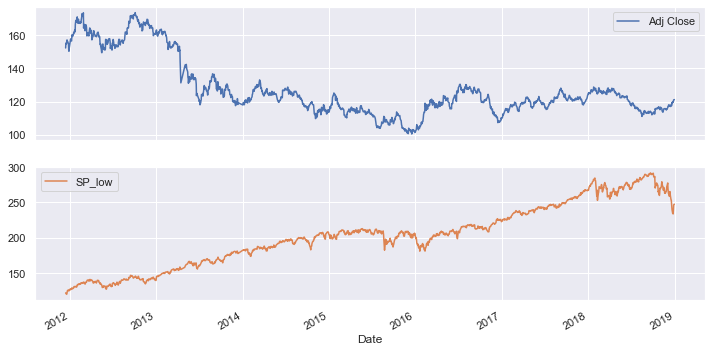

<Figure size 864x432 with 0 Axes>

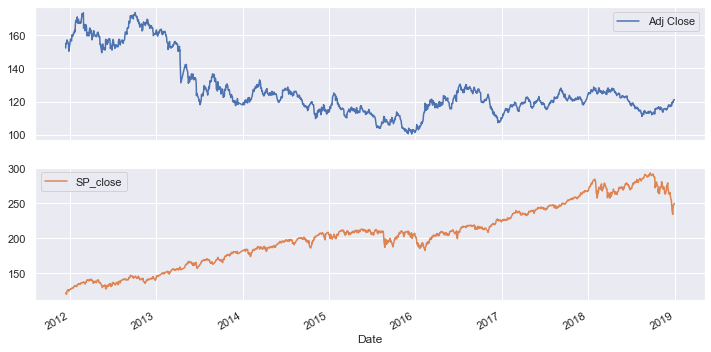

<Figure size 864x432 with 0 Axes>

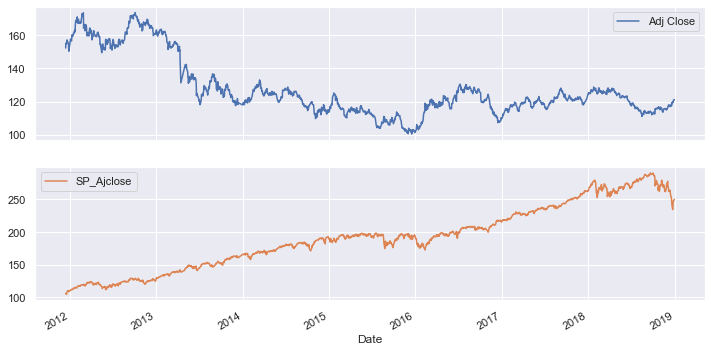

<Figure size 864x432 with 0 Axes>

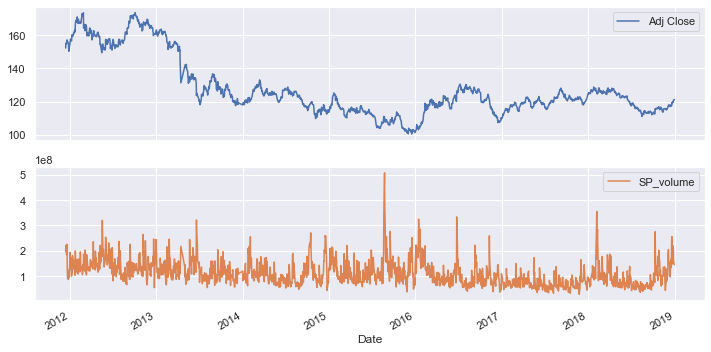

<Figure size 864x432 with 0 Axes>

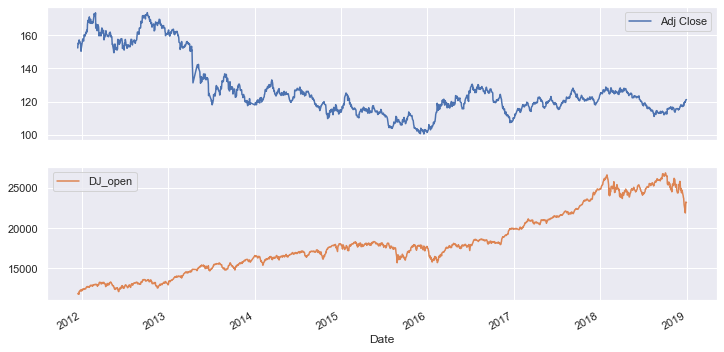

<Figure size 864x432 with 0 Axes>

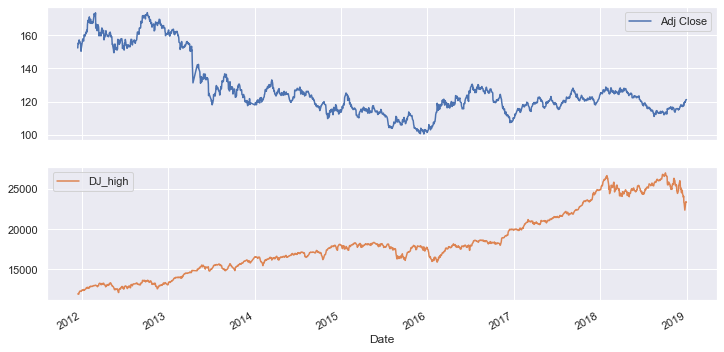

<Figure size 864x432 with 0 Axes>

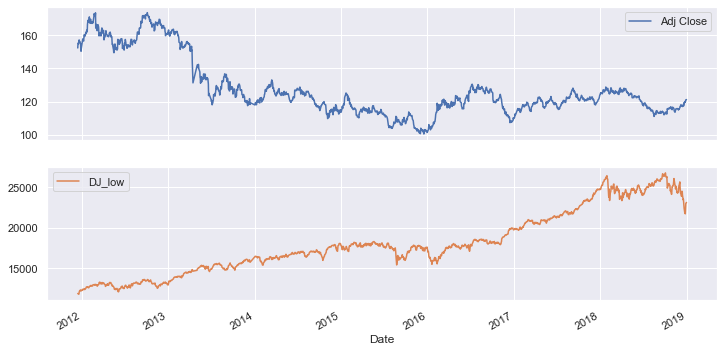

<Figure size 864x432 with 0 Axes>

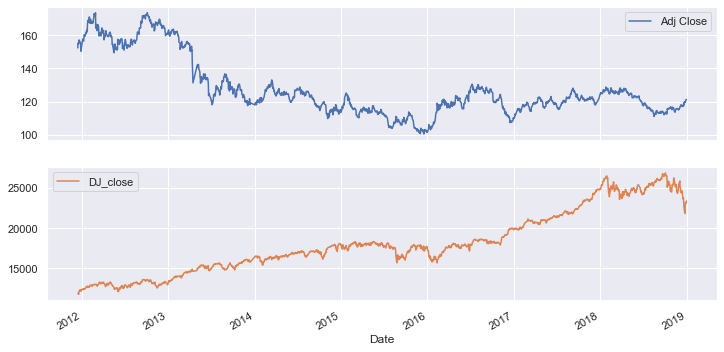

<Figure size 864x432 with 0 Axes>

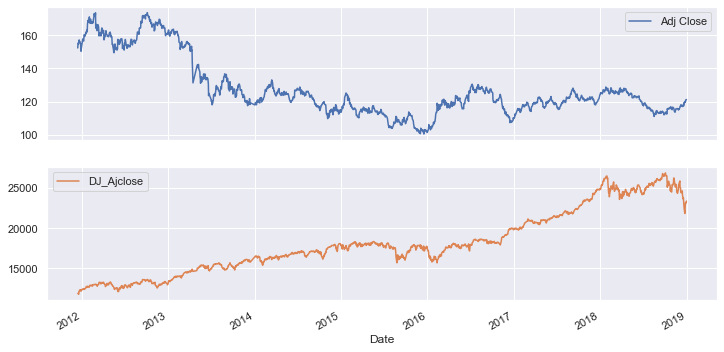

<Figure size 864x432 with 0 Axes>

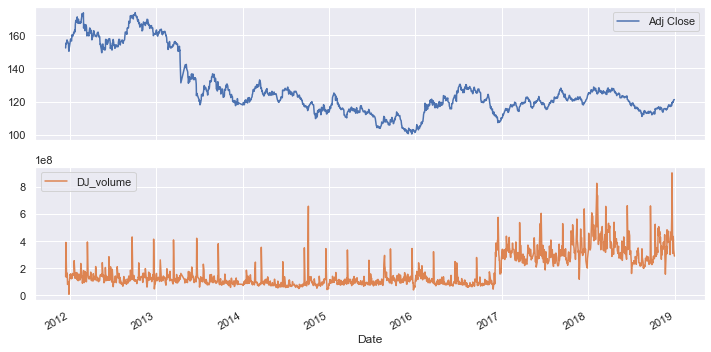

<Figure size 864x432 with 0 Axes>

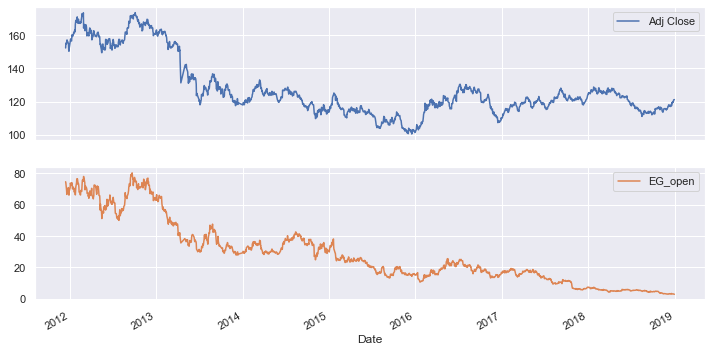

<Figure size 864x432 with 0 Axes>

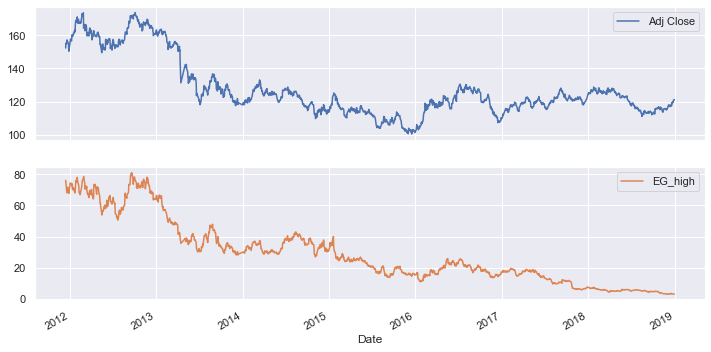

<Figure size 864x432 with 0 Axes>

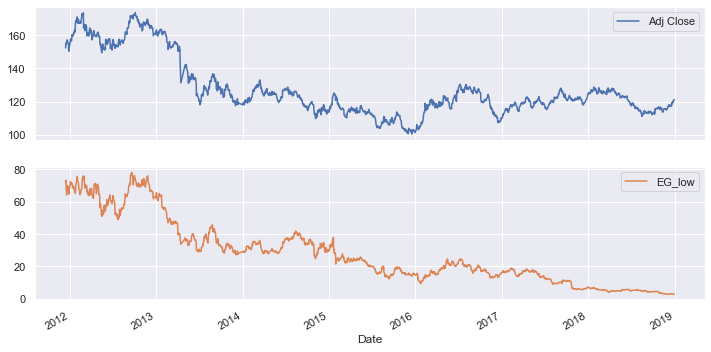

<Figure size 864x432 with 0 Axes>

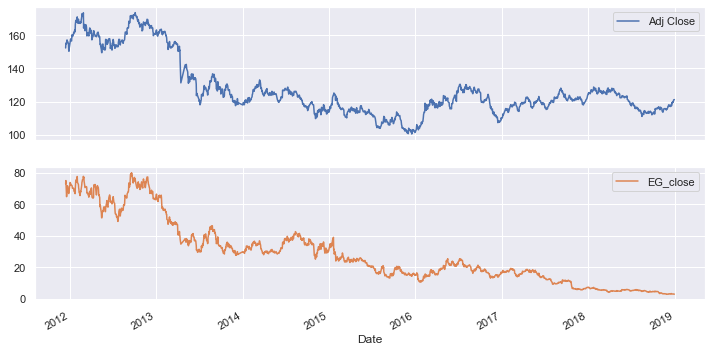

<Figure size 864x432 with 0 Axes>

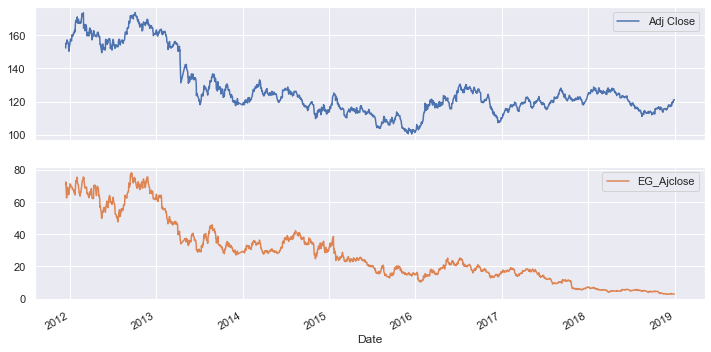

<Figure size 864x432 with 0 Axes>

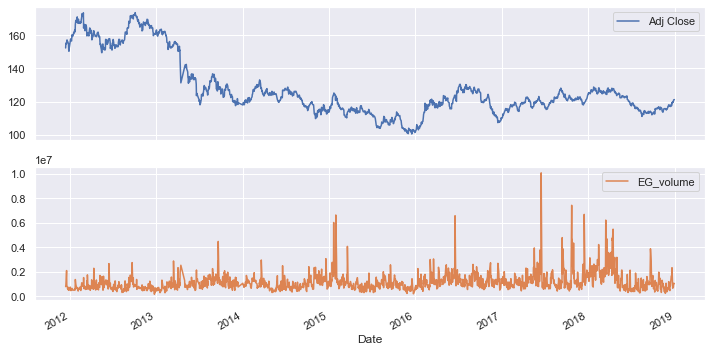

<Figure size 864x432 with 0 Axes>

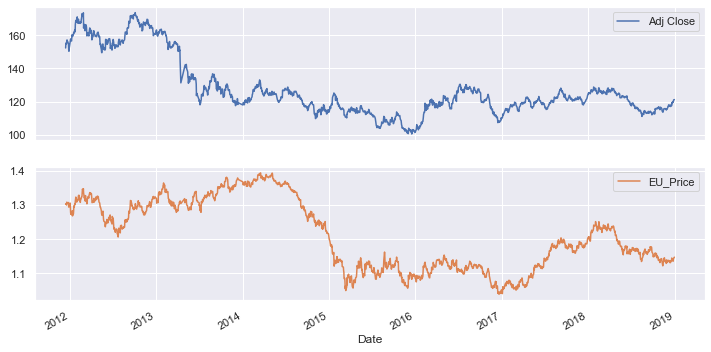

<Figure size 864x432 with 0 Axes>

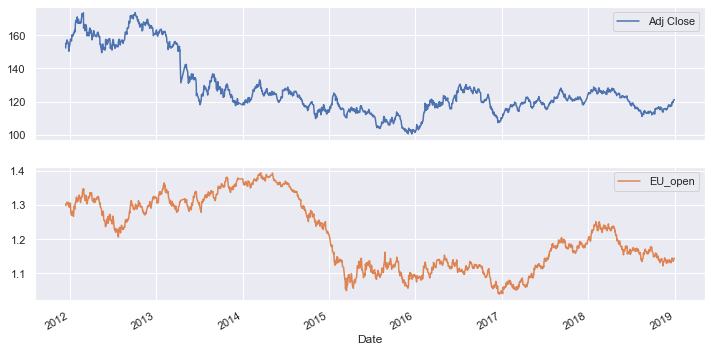

<Figure size 864x432 with 0 Axes>

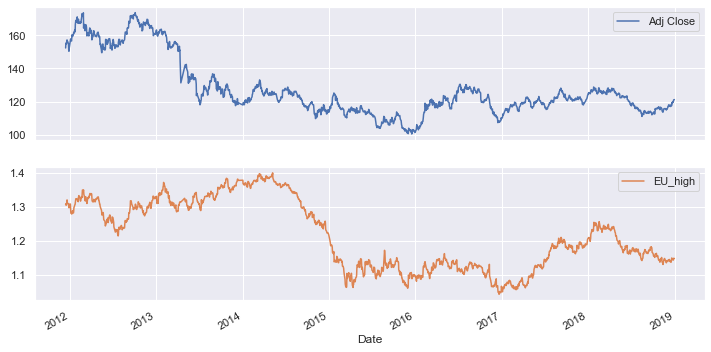

<Figure size 864x432 with 0 Axes>

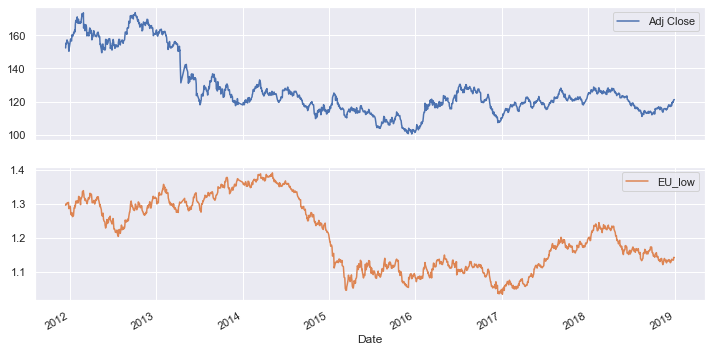

<Figure size 864x432 with 0 Axes>

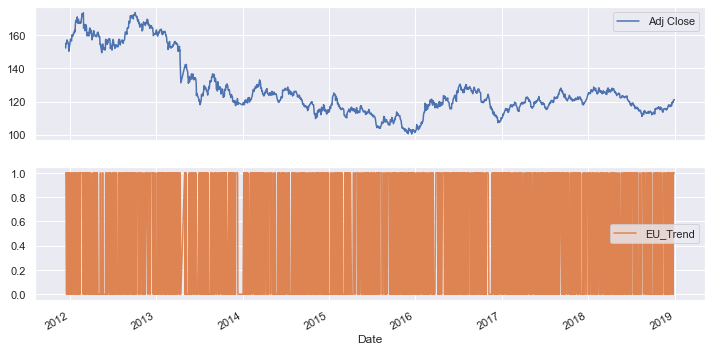

<Figure size 864x432 with 0 Axes>

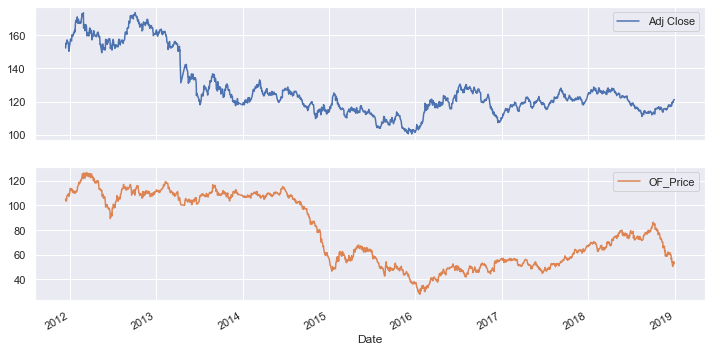

<Figure size 864x432 with 0 Axes>

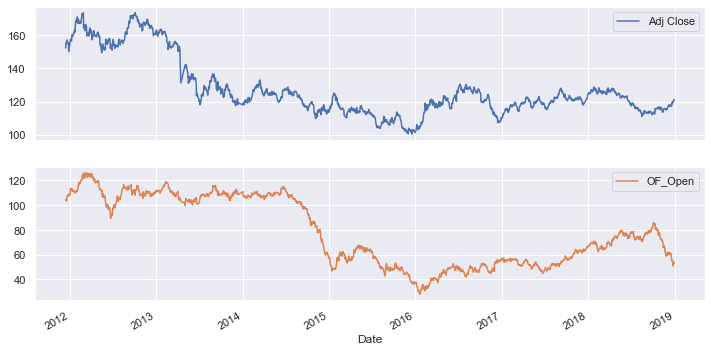

<Figure size 864x432 with 0 Axes>

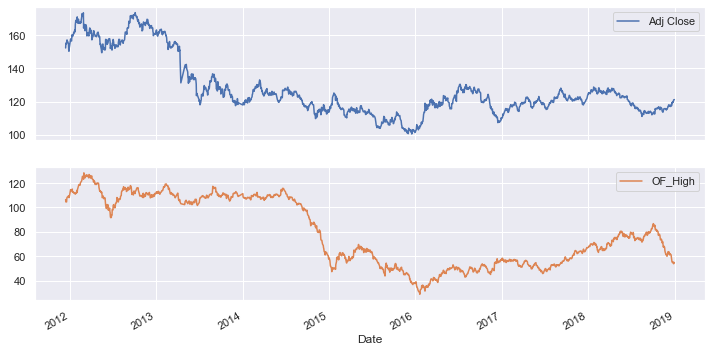

<Figure size 864x432 with 0 Axes>

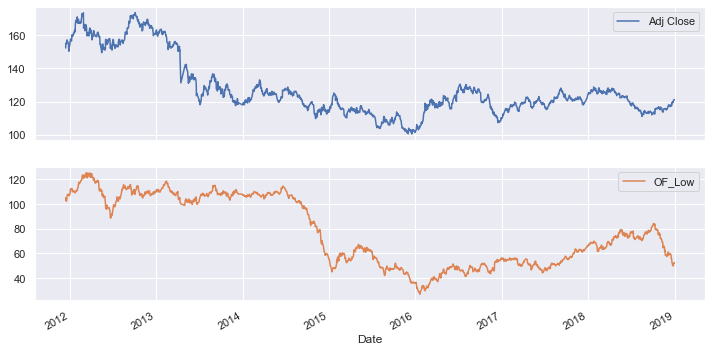

<Figure size 864x432 with 0 Axes>

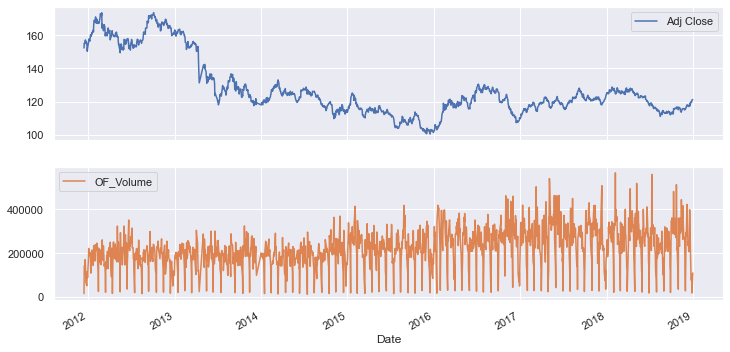

<Figure size 864x432 with 0 Axes>

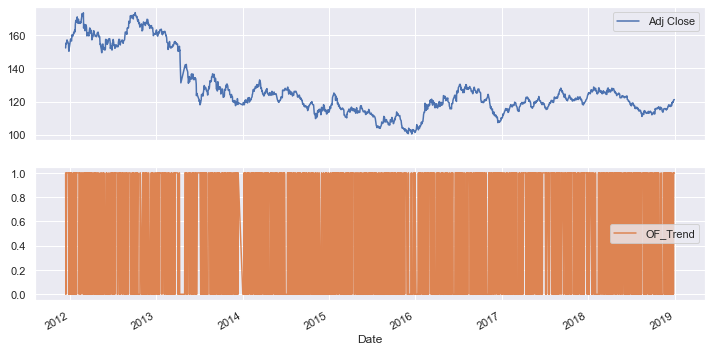

<Figure size 864x432 with 0 Axes>

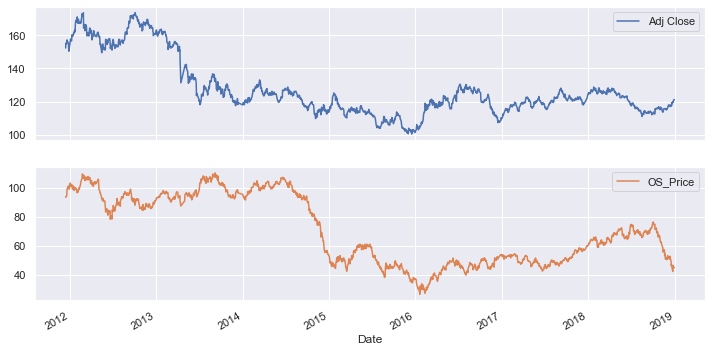

<Figure size 864x432 with 0 Axes>

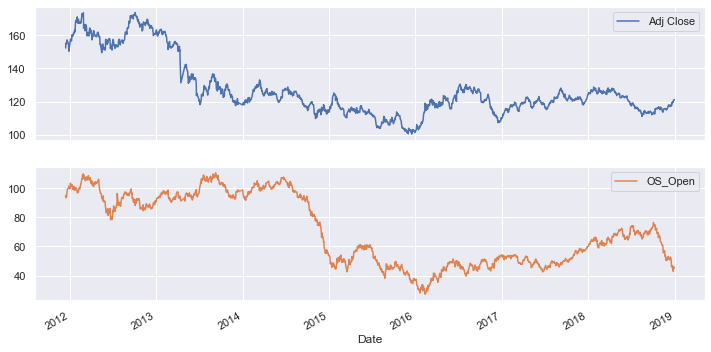

<Figure size 864x432 with 0 Axes>

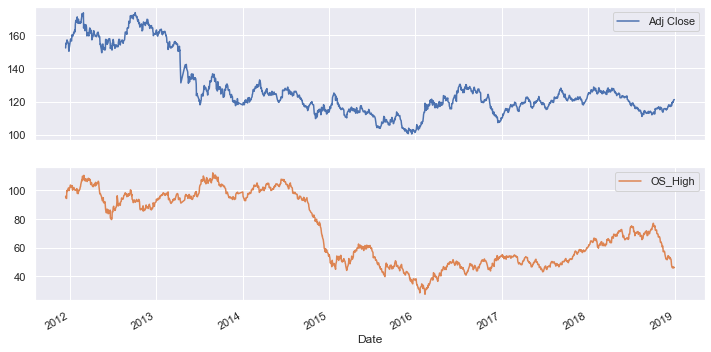

<Figure size 864x432 with 0 Axes>

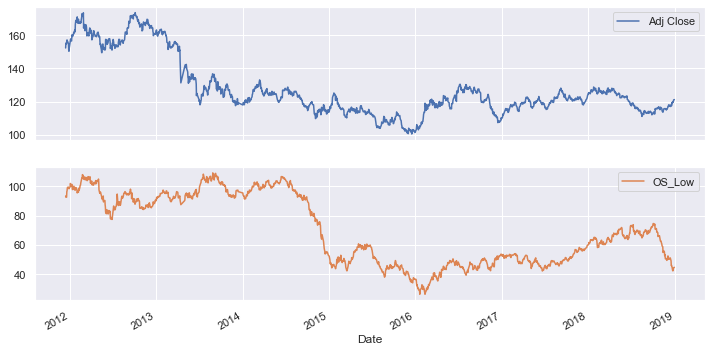

<Figure size 864x432 with 0 Axes>

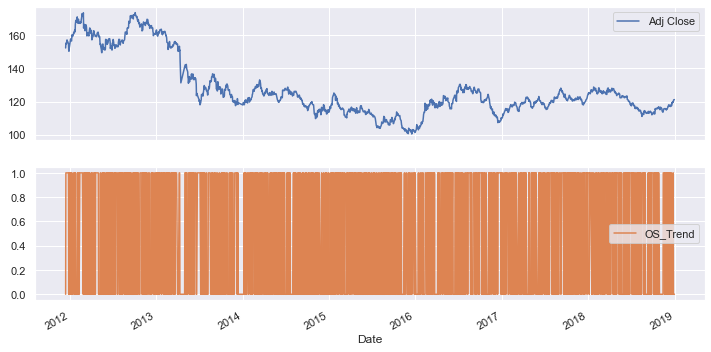

<Figure size 864x432 with 0 Axes>

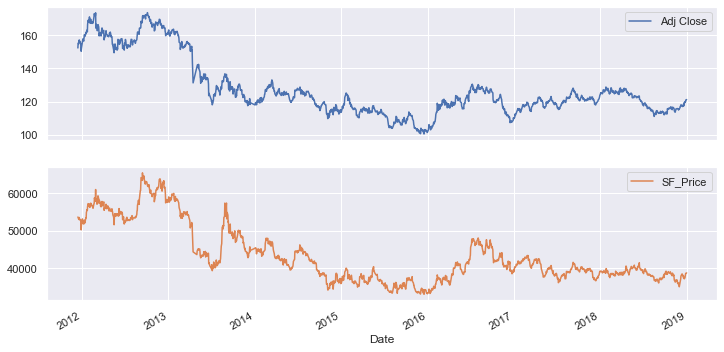

<Figure size 864x432 with 0 Axes>

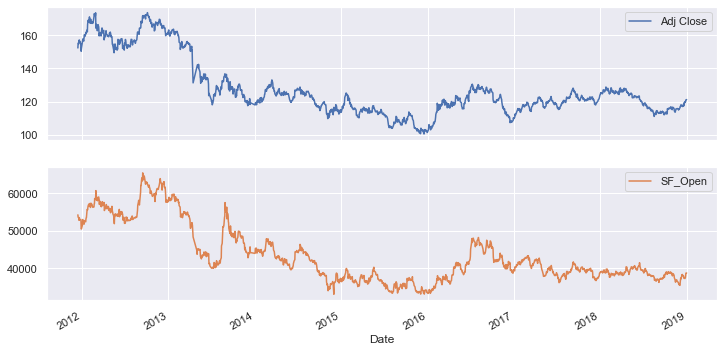

<Figure size 864x432 with 0 Axes>

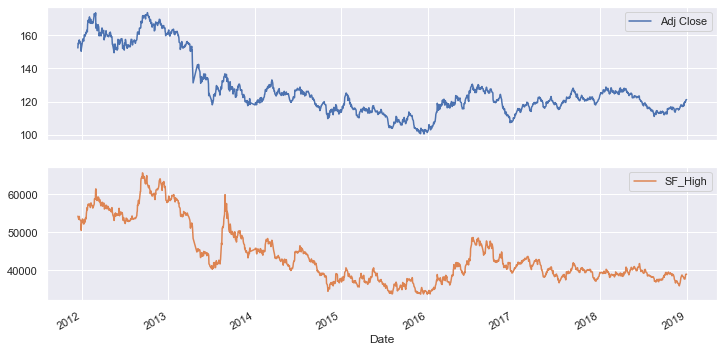

<Figure size 864x432 with 0 Axes>

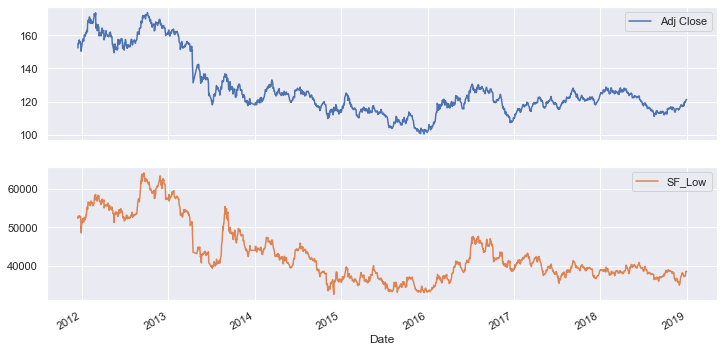

<Figure size 864x432 with 0 Axes>

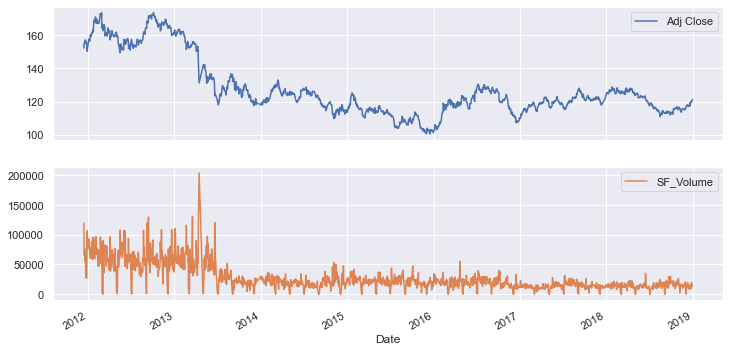

<Figure size 864x432 with 0 Axes>

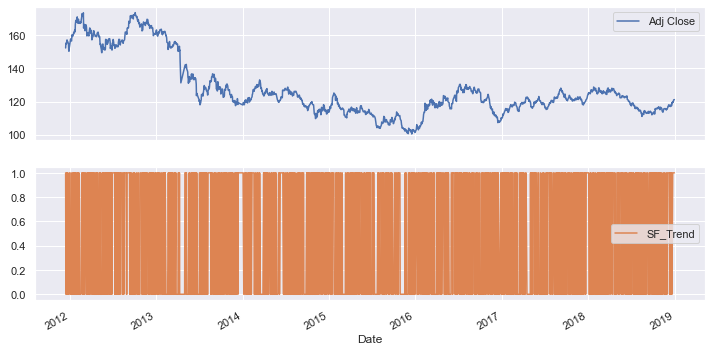

<Figure size 864x432 with 0 Axes>

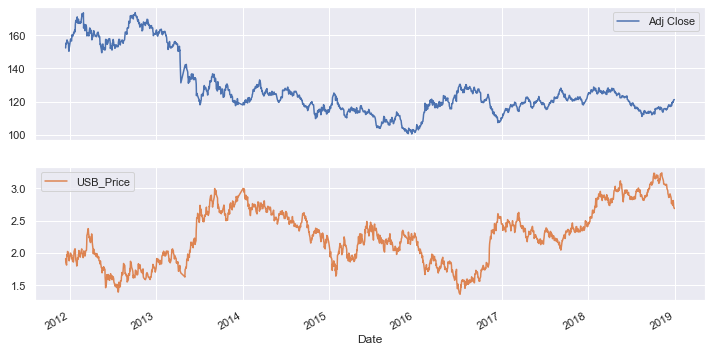

<Figure size 864x432 with 0 Axes>

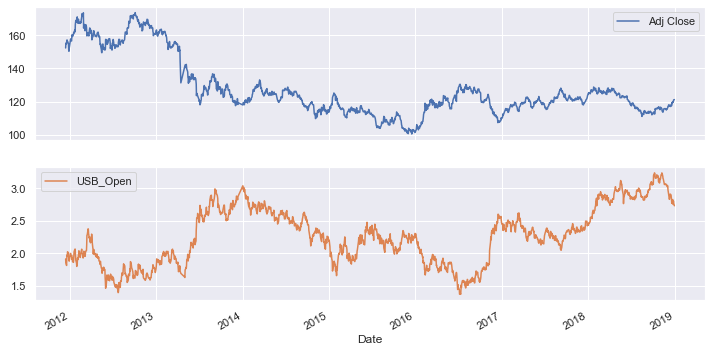

<Figure size 864x432 with 0 Axes>

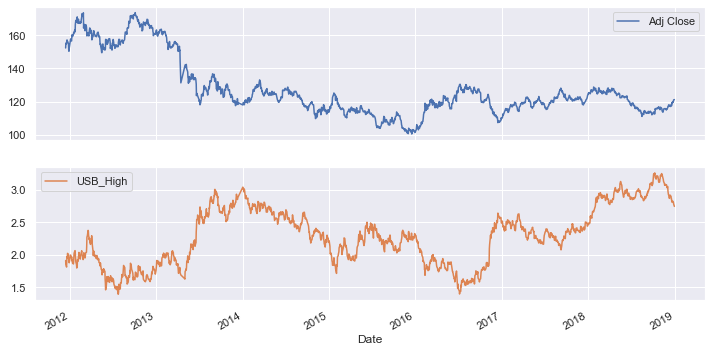

<Figure size 864x432 with 0 Axes>

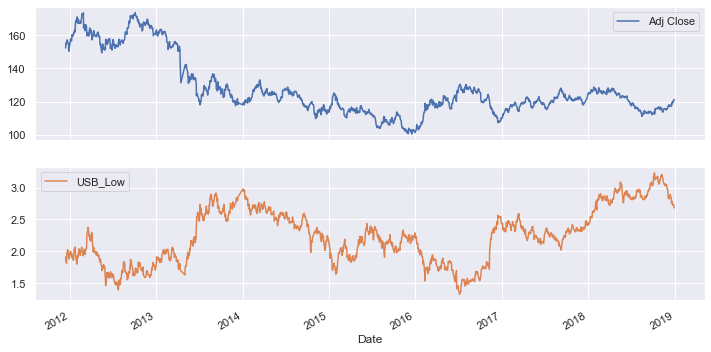

<Figure size 864x432 with 0 Axes>

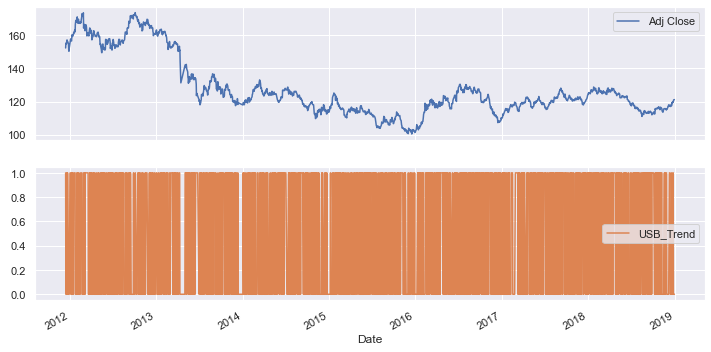

<Figure size 864x432 with 0 Axes>

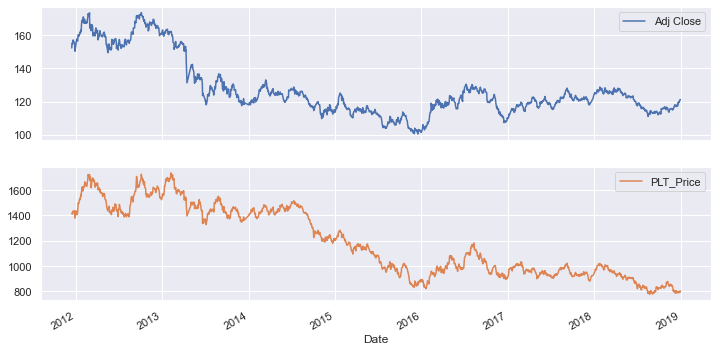

<Figure size 864x432 with 0 Axes>

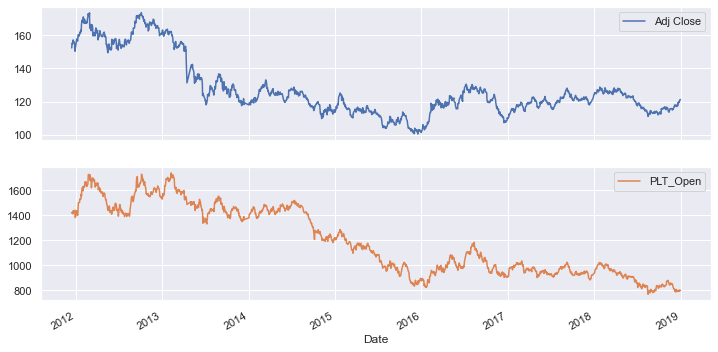

<Figure size 864x432 with 0 Axes>

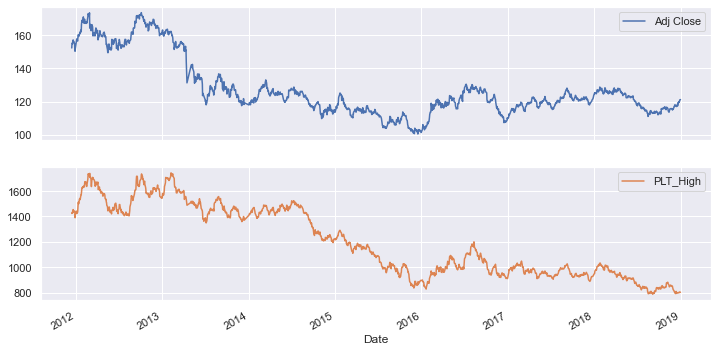

<Figure size 864x432 with 0 Axes>

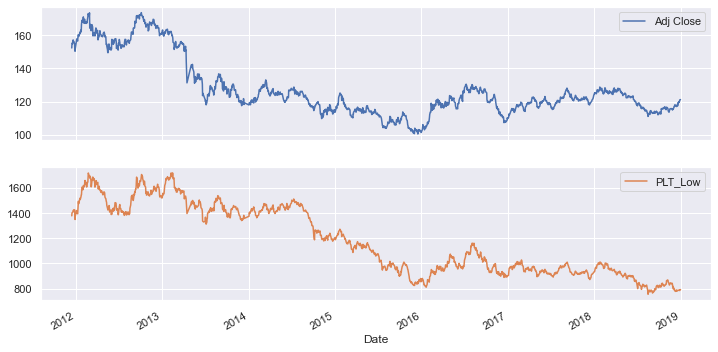

<Figure size 864x432 with 0 Axes>

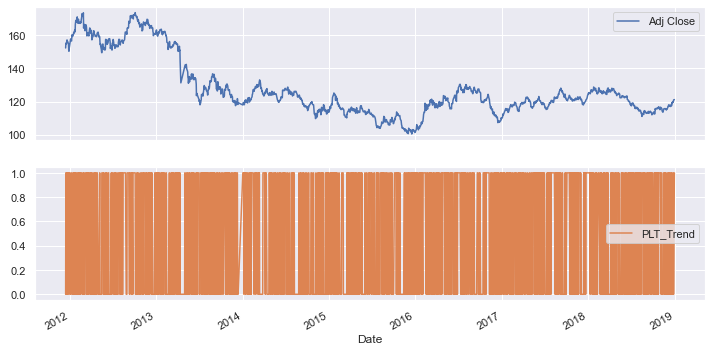

<Figure size 864x432 with 0 Axes>

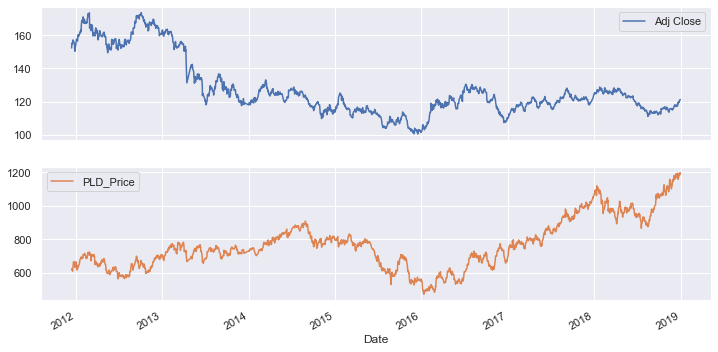

<Figure size 864x432 with 0 Axes>

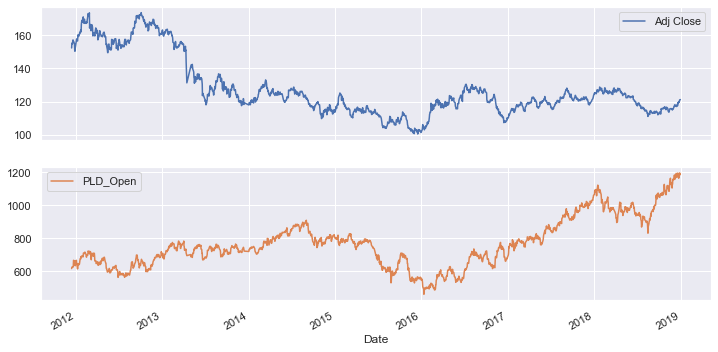

<Figure size 864x432 with 0 Axes>

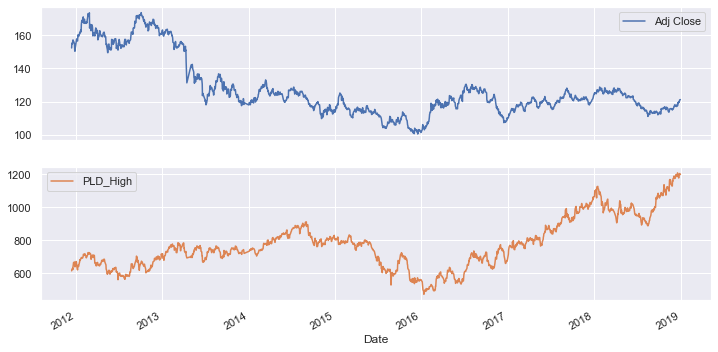

<Figure size 864x432 with 0 Axes>

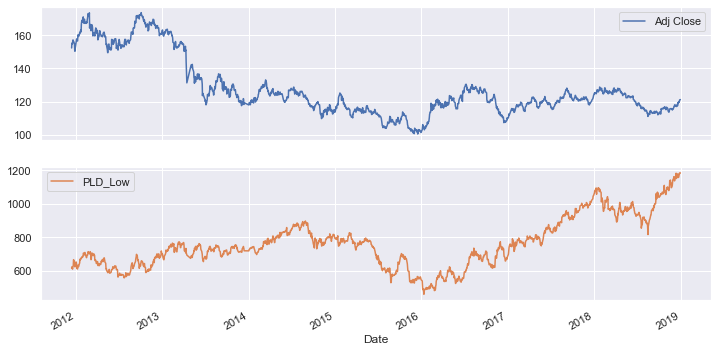

<Figure size 864x432 with 0 Axes>

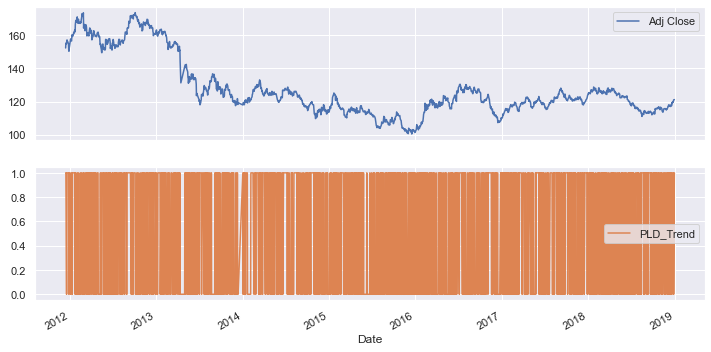

<Figure size 864x432 with 0 Axes>

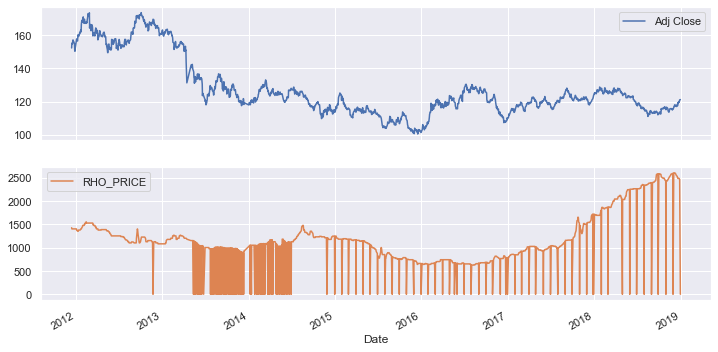

<Figure size 864x432 with 0 Axes>

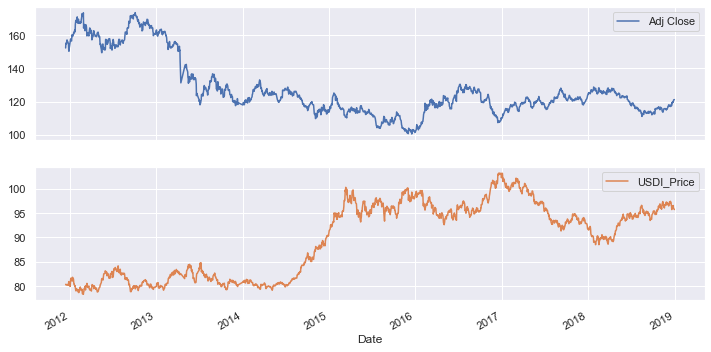

<Figure size 864x432 with 0 Axes>

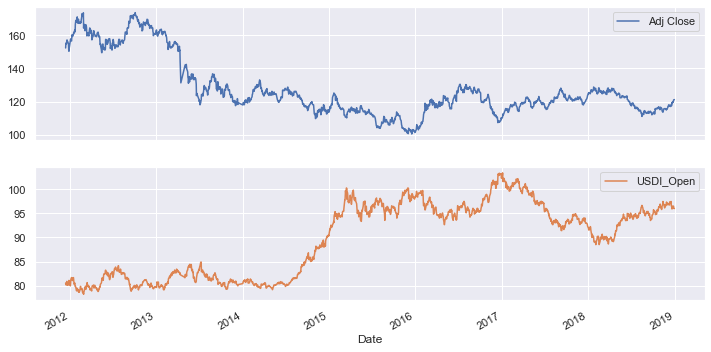

<Figure size 864x432 with 0 Axes>

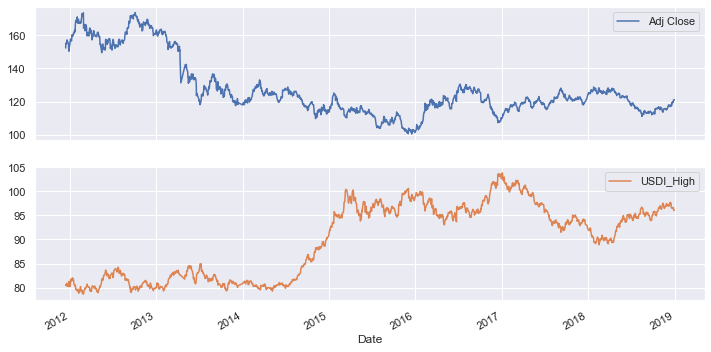

<Figure size 864x432 with 0 Axes>

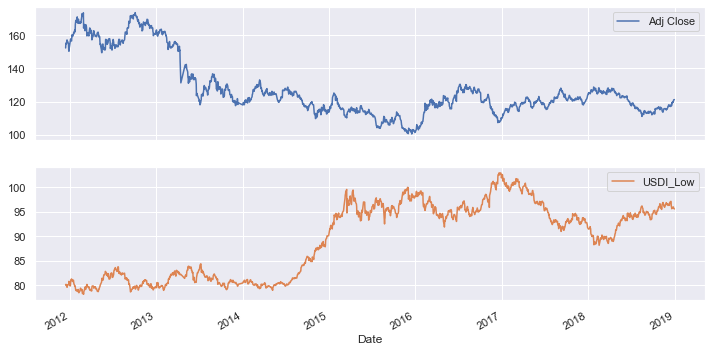

<Figure size 864x432 with 0 Axes>

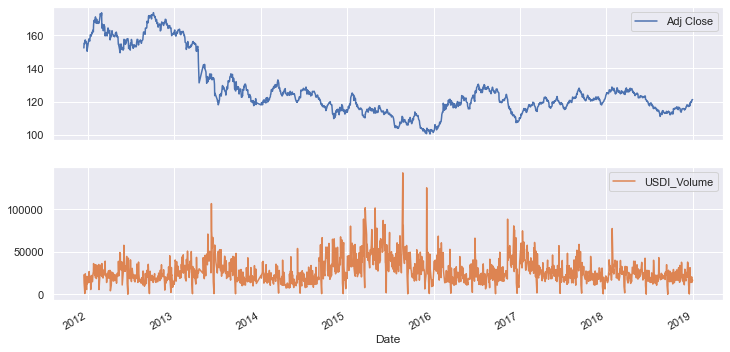

<Figure size 864x432 with 0 Axes>

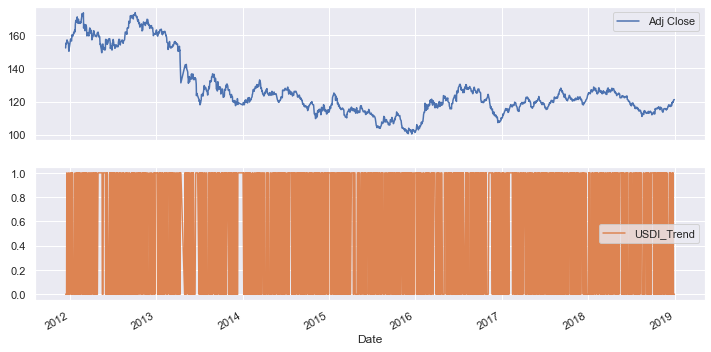

<Figure size 864x432 with 0 Axes>

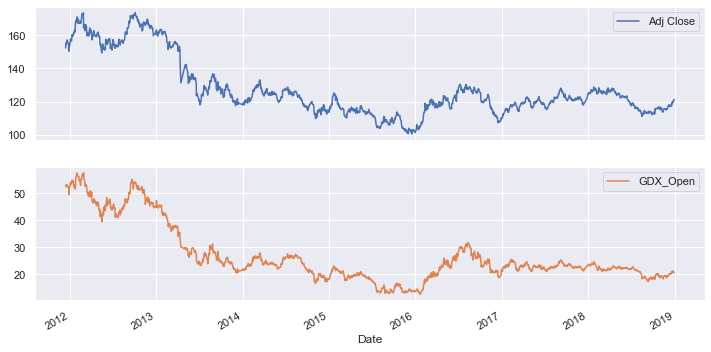

<Figure size 864x432 with 0 Axes>

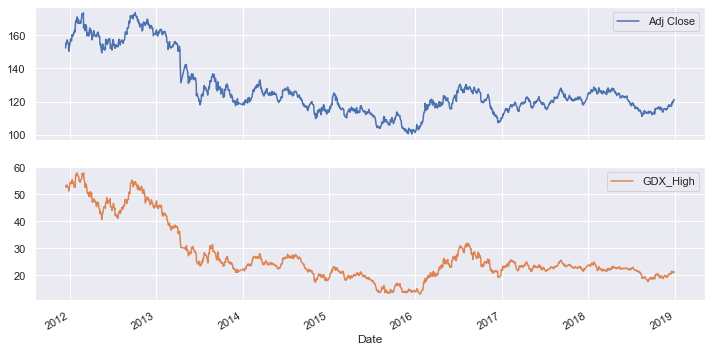

<Figure size 864x432 with 0 Axes>

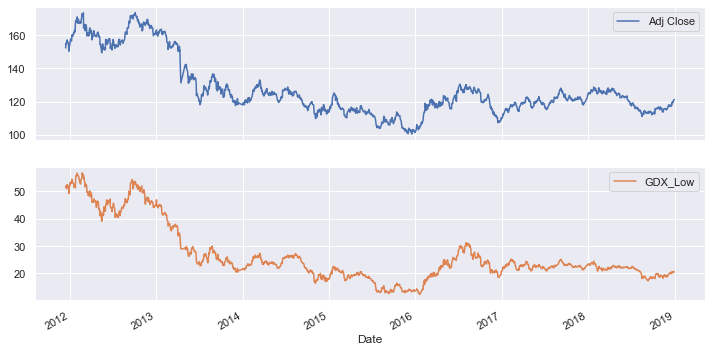

<Figure size 864x432 with 0 Axes>

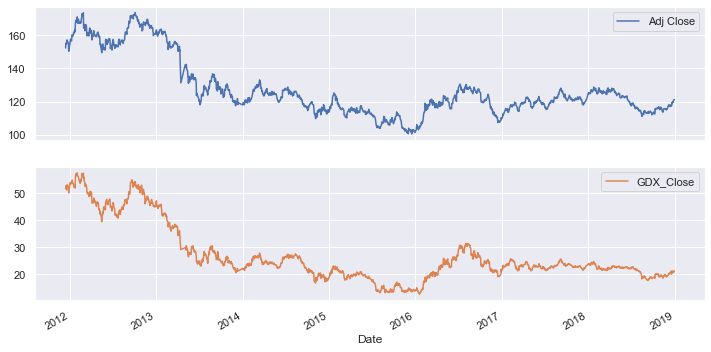

<Figure size 864x432 with 0 Axes>

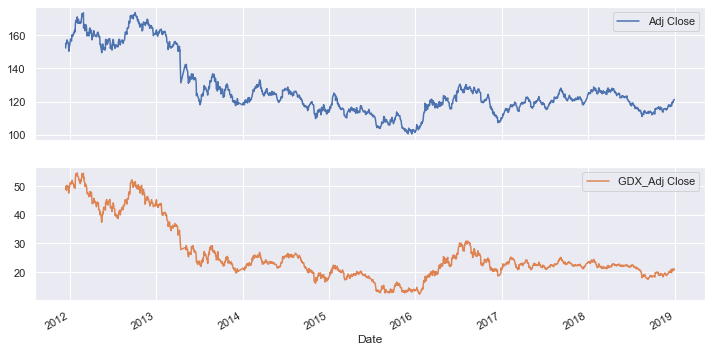

<Figure size 864x432 with 0 Axes>

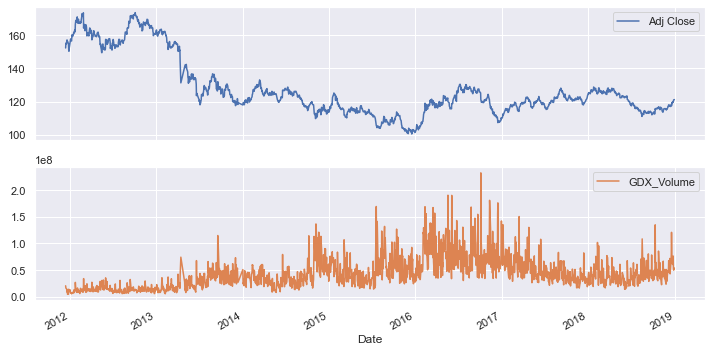

<Figure size 864x432 with 0 Axes>

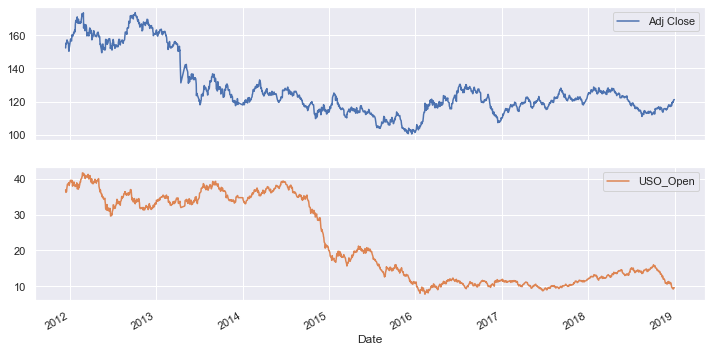

<Figure size 864x432 with 0 Axes>

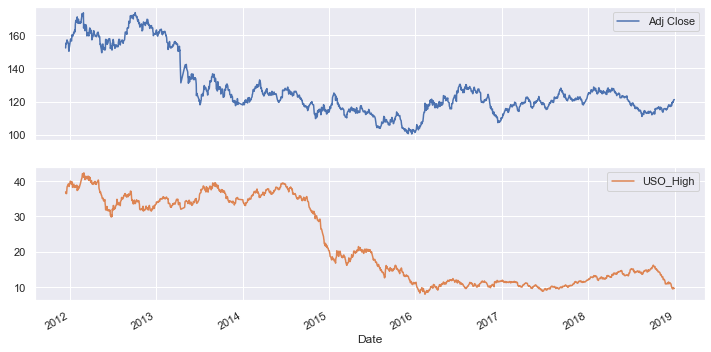

<Figure size 864x432 with 0 Axes>

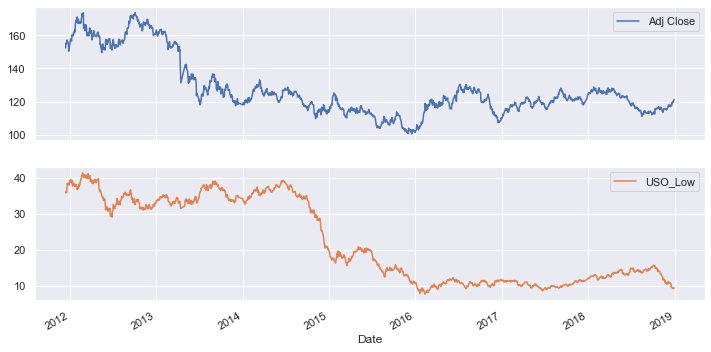

<Figure size 864x432 with 0 Axes>

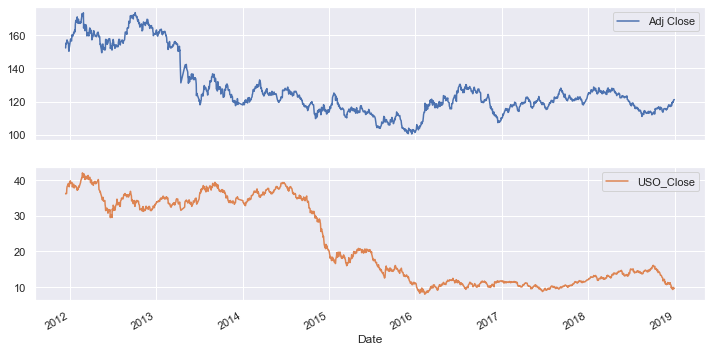

<Figure size 864x432 with 0 Axes>

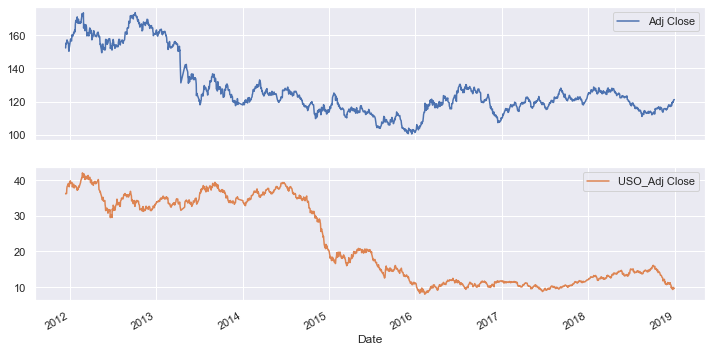

<Figure size 864x432 with 0 Axes>

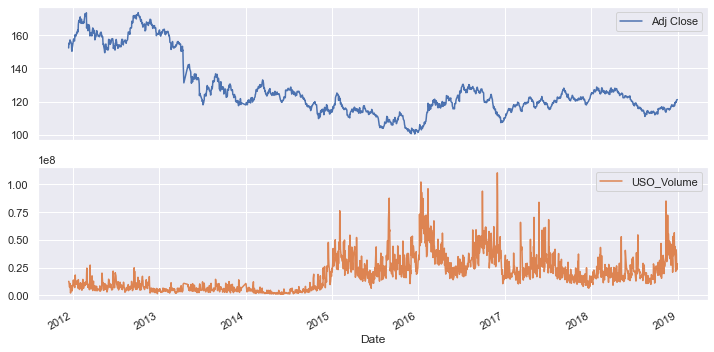

In [14]:
for col in d.columns:
    plt.figure(figsize=(12,6))
    df[['Adj Close',col]].plot.line(subplots=True, figsize=(12, 6))
    #plt.savefig(f'figures/Adj_Close_{col}.png', dpi=200)
    plt.show()

- Affichage de la matrice de correlation

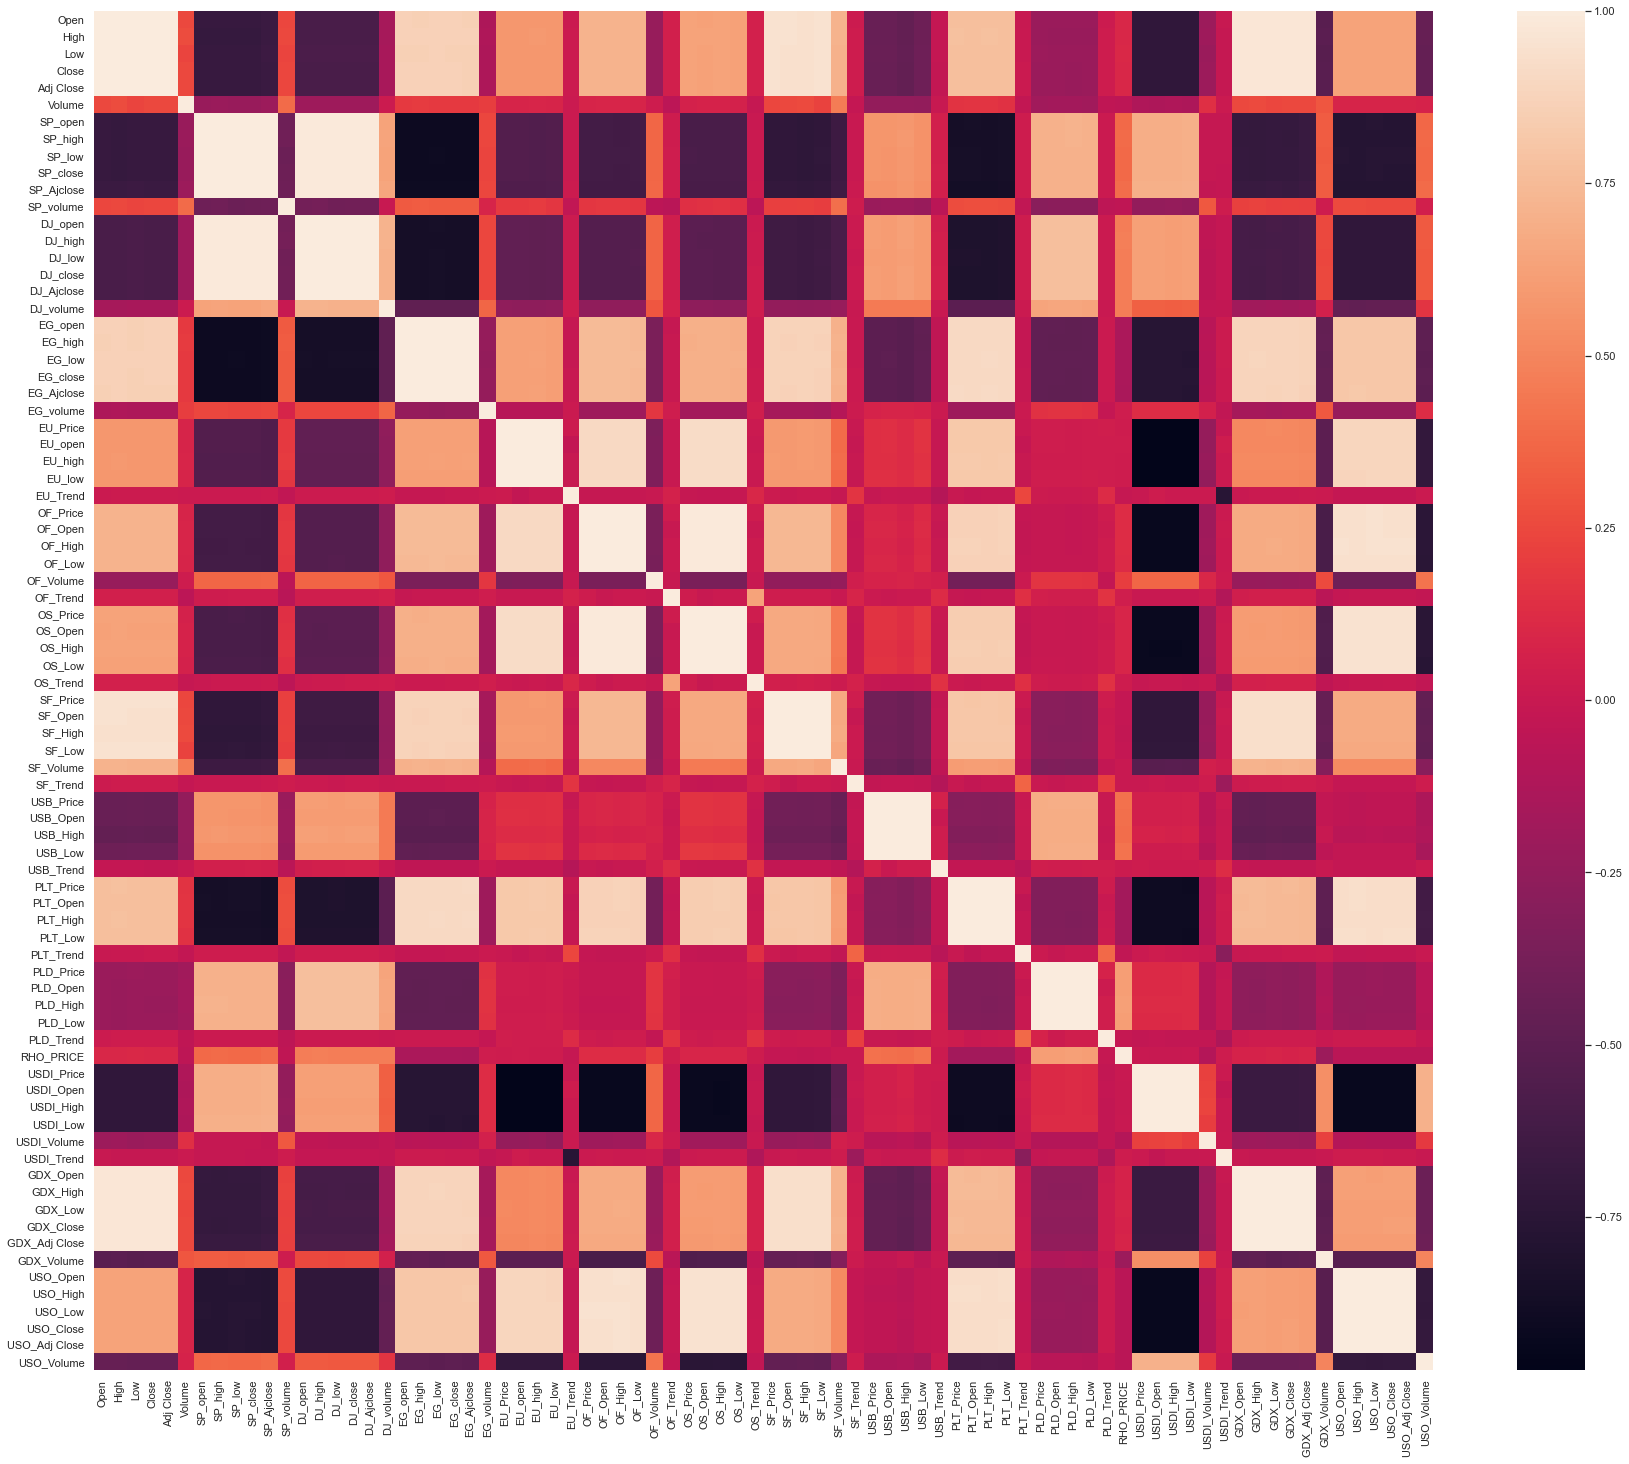

In [15]:
plt.figure(figsize=(30,25))
sns.heatmap(df.corr())
plt.show()
#fig = px.imshow(df.corr())
#fig.show()

* Calcule du coeficient de Correlation et visualisation des graphes de coéficients de rélations

In [16]:
X = df.drop(['Adj Close'], axis=1)

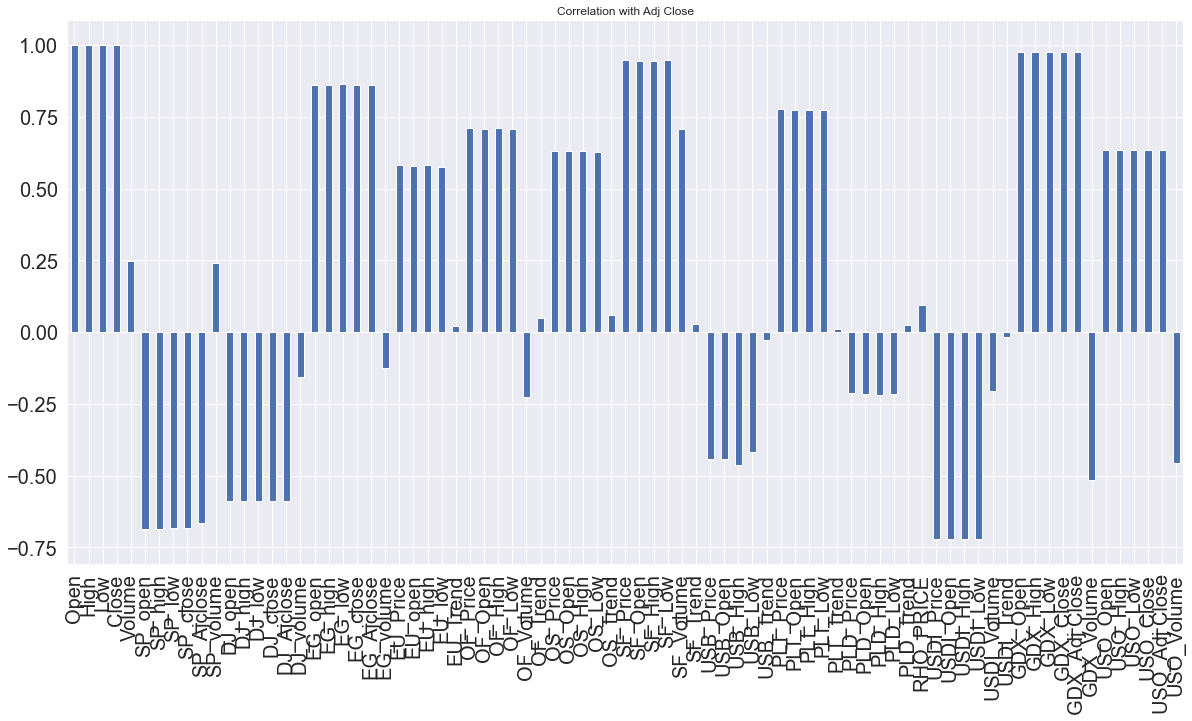

In [17]:
X.corrwith(df['Adj Close']).plot.bar(figsize = (20, 10), title = "Correlation with Adj Close", fontsize = 20, rot = 90, grid = True)
plt.show()

In [18]:
corr_matrix = df.corr()
coef = corr_matrix['Adj Close'].sort_values(ascending = False)

* Variable positivement corrélé avec la variable cible

In [19]:
pos_corr = coef[coef>0]
neg_corr = coef[coef<0]
goodCorrelation = pos_corr.index.tolist()
badCorrelation = neg_corr.index.tolist()

In [20]:
print(f'Il y a {len(goodCorrelation)*100/79}% des variables de notre jeux de données qui sont corrélées positivement à la variable cible.')
print(f'Il y a {len(badCorrelation)*100/79}% des variables de notre jeux de données qui sont corrélées négativement à la variable cible.')

Il y a 63.29113924050633% des variables de notre jeux de données qui sont corrélées positivement à la variable cible.
Il y a 37.9746835443038% des variables de notre jeux de données qui sont corrélées négativement à la variable cible.


* Il y a 63% des variables de notre jeux de données qui sont corrélées positivement à la variable cible.
* Il y a 37% des variables de notre jeux de données qui sont corrélées négativement à la variable cible.


* Determination des outliers

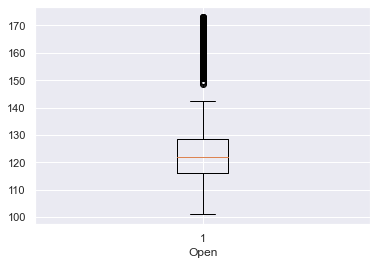

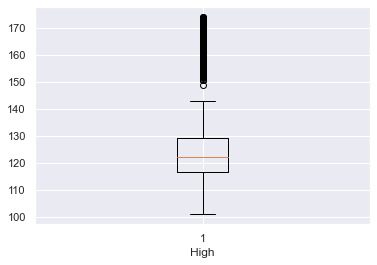

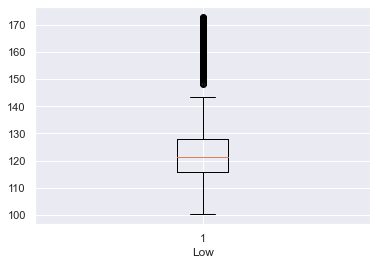

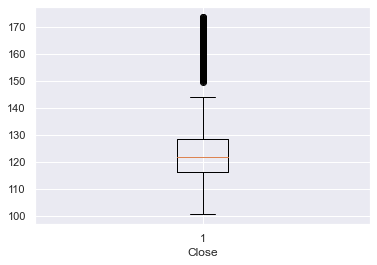

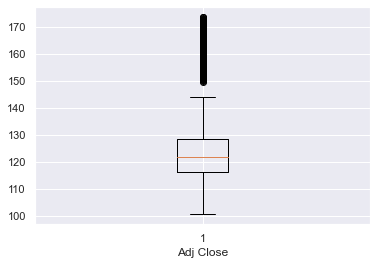

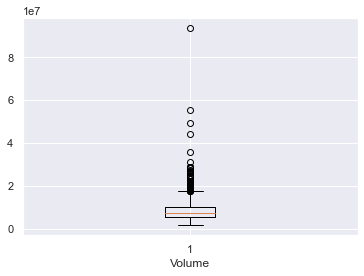

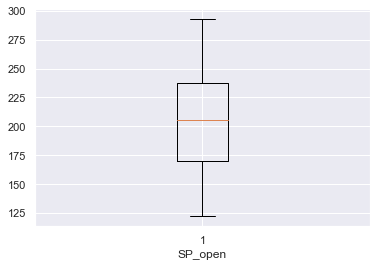

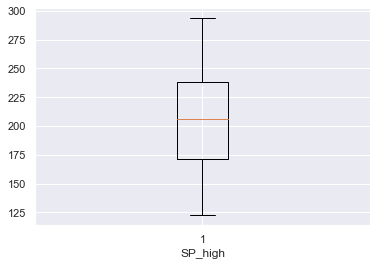

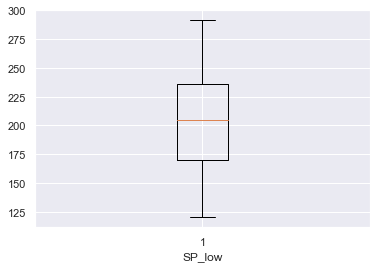

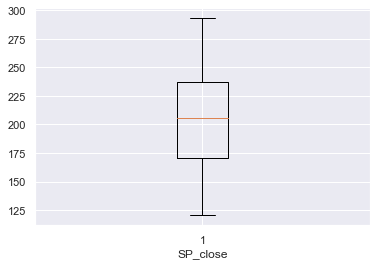

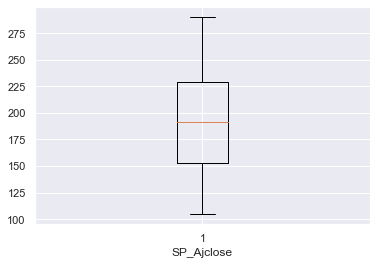

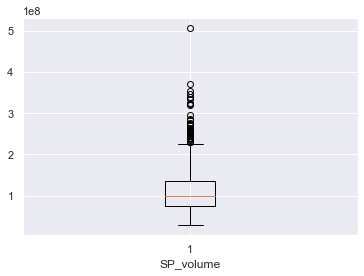

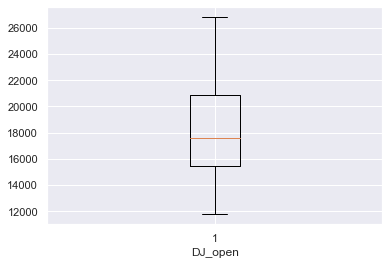

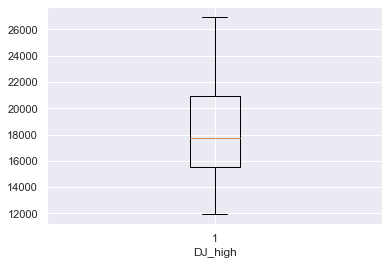

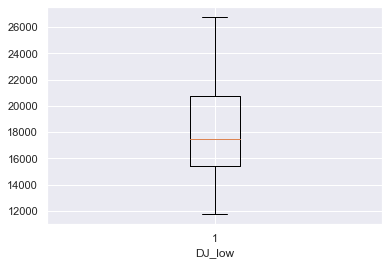

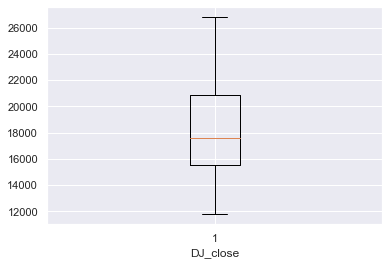

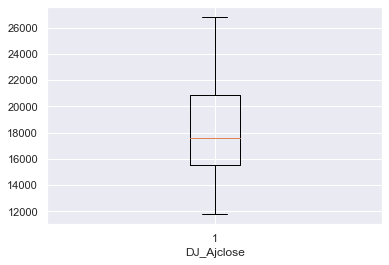

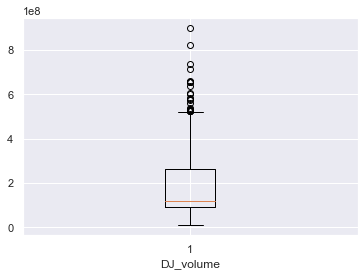

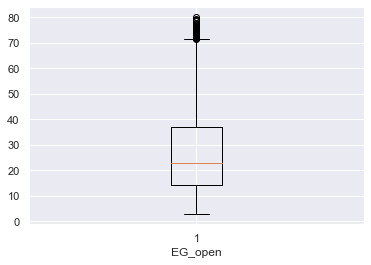

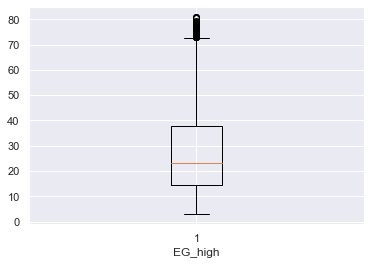

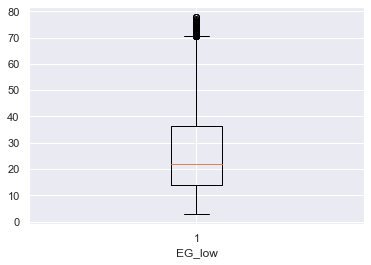

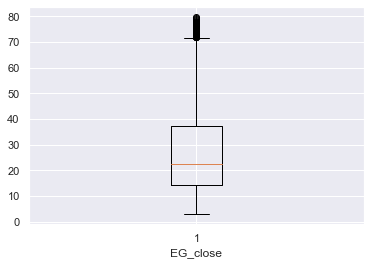

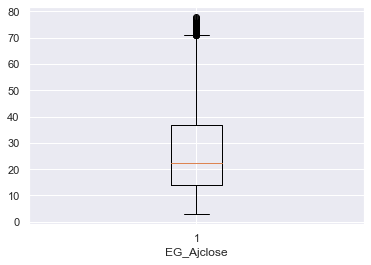

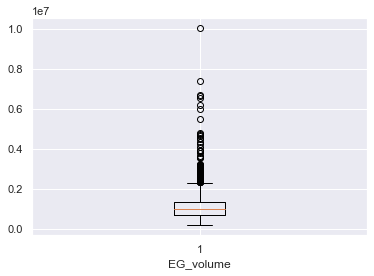

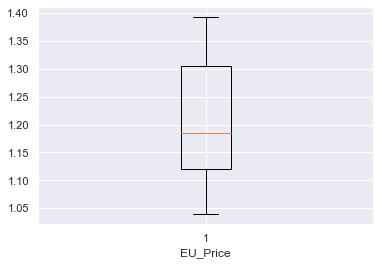

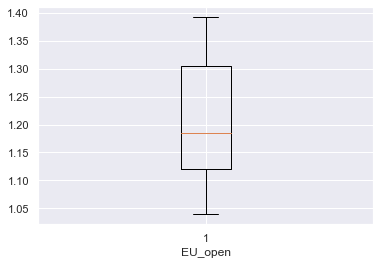

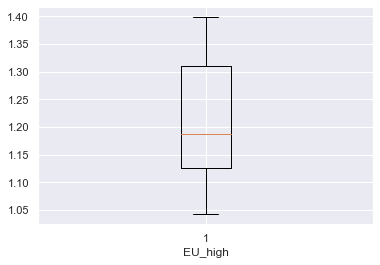

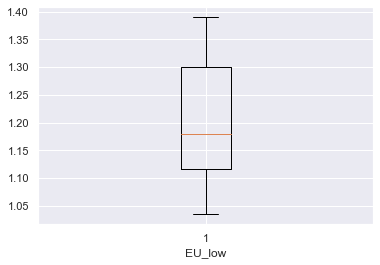

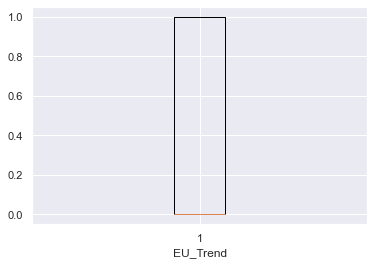

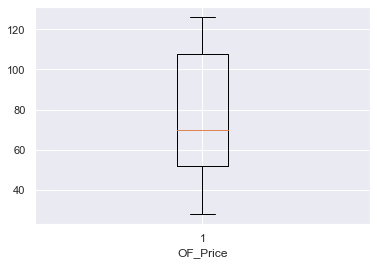

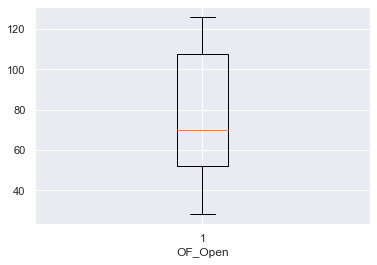

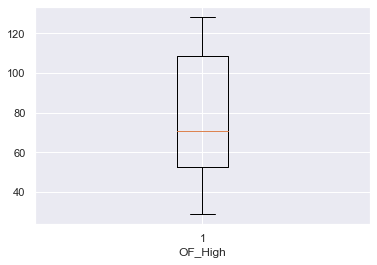

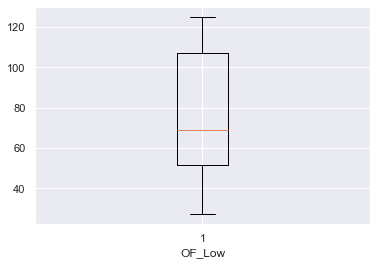

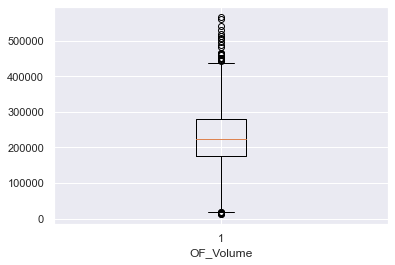

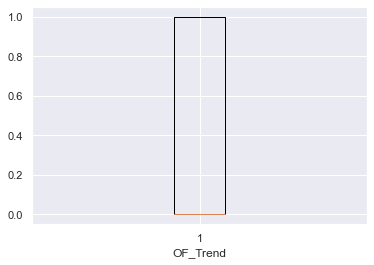

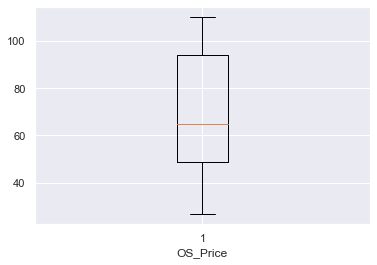

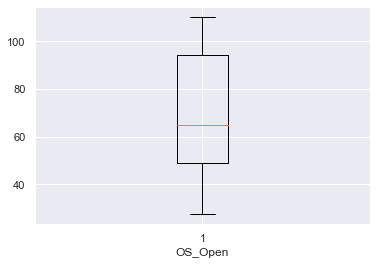

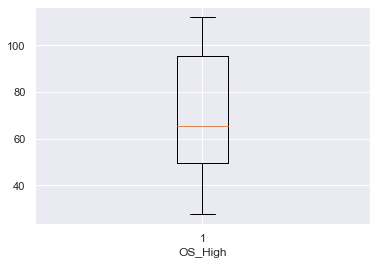

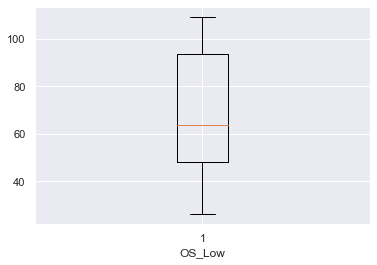

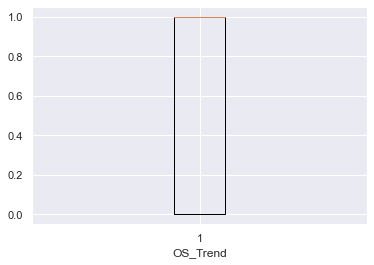

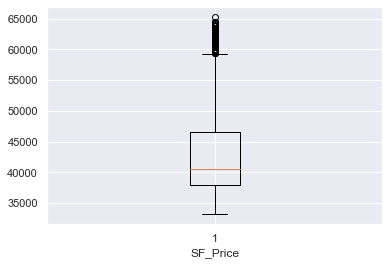

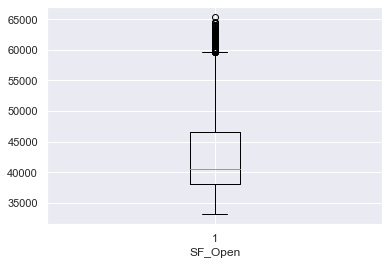

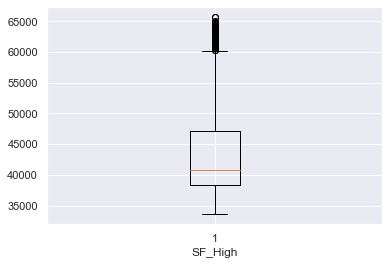

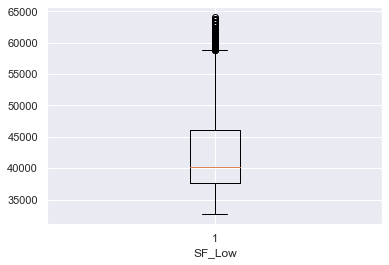

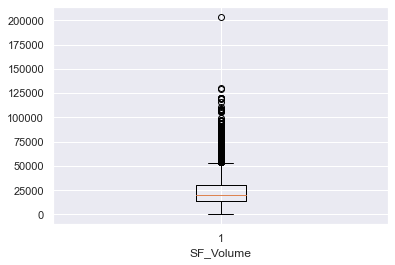

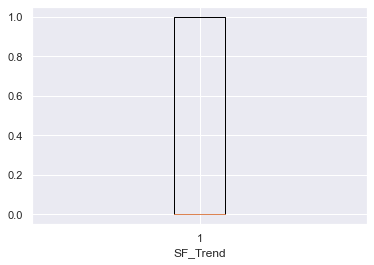

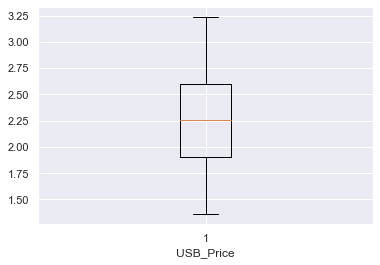

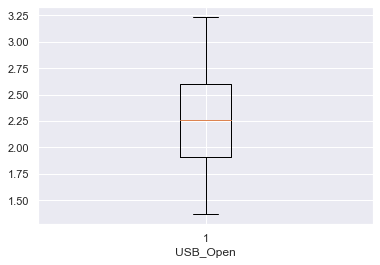

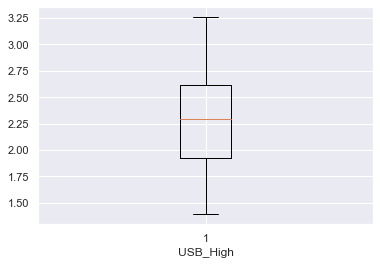

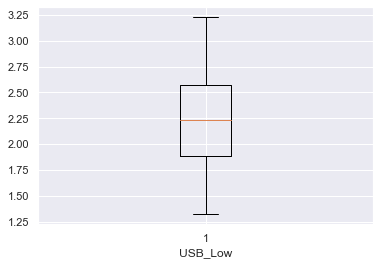

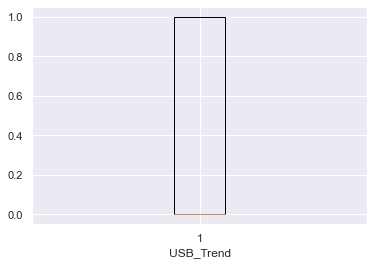

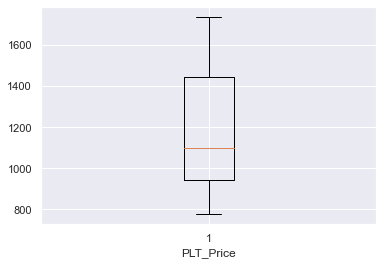

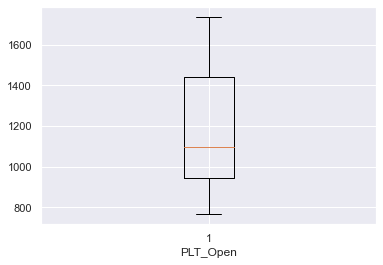

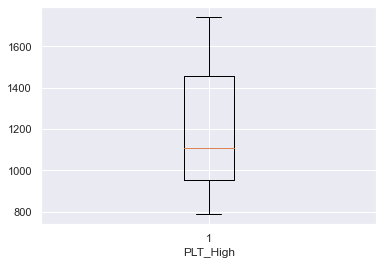

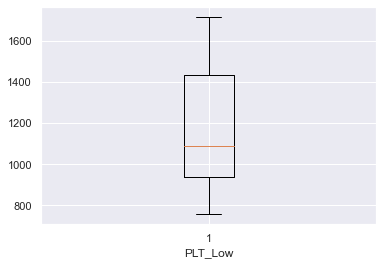

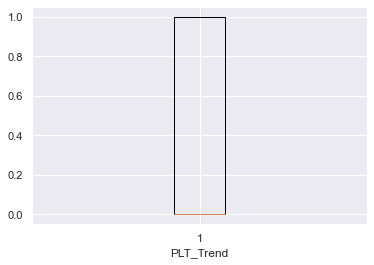

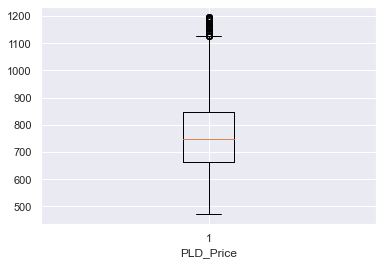

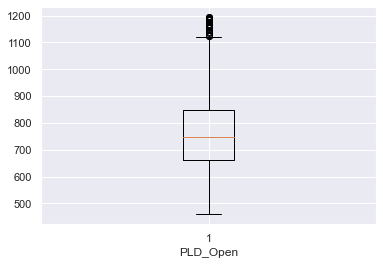

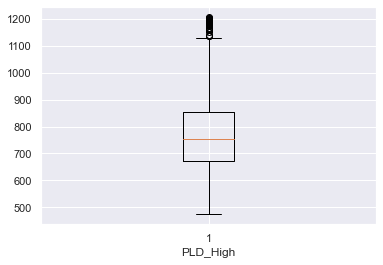

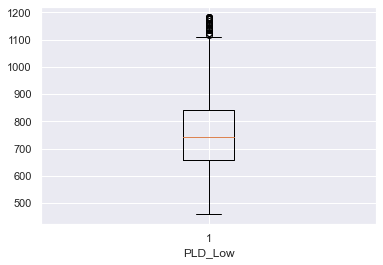

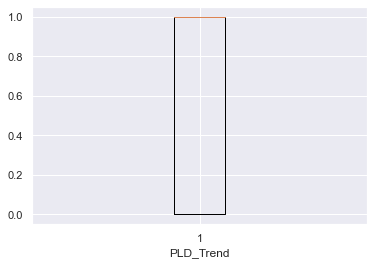

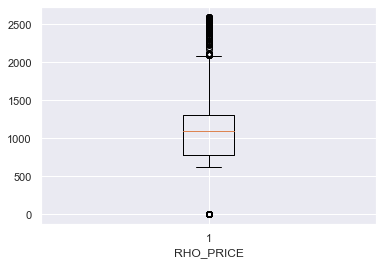

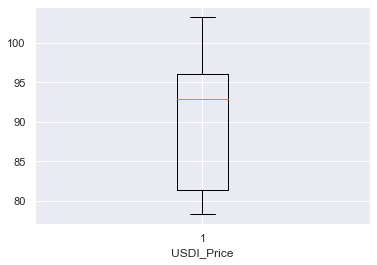

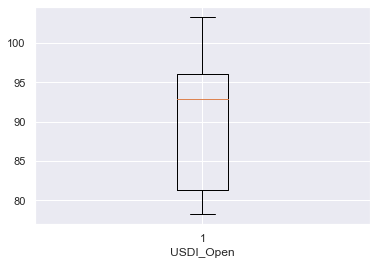

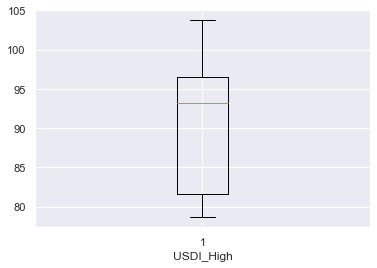

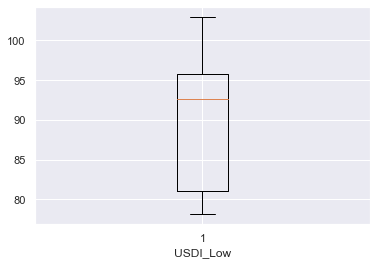

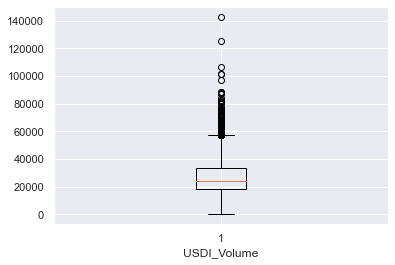

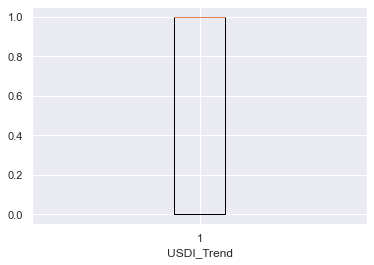

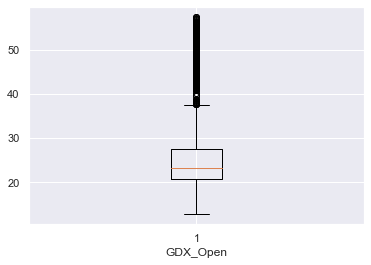

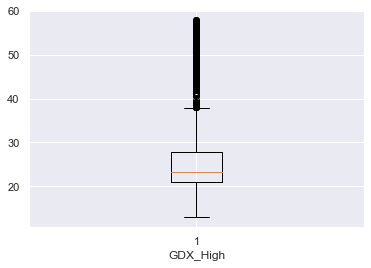

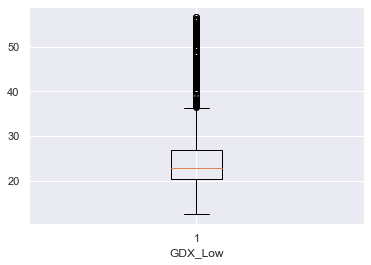

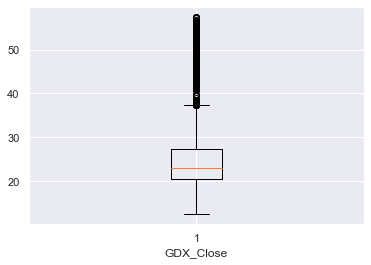

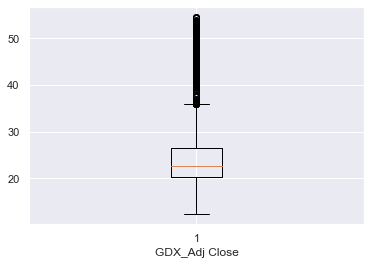

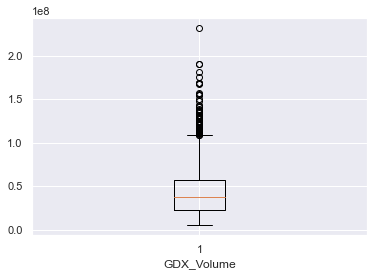

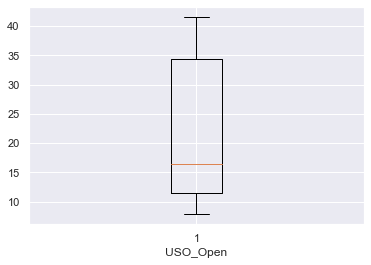

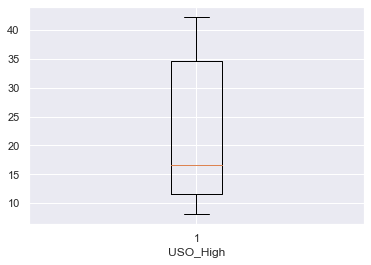

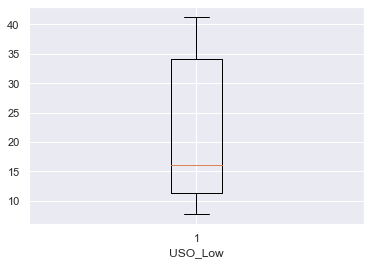

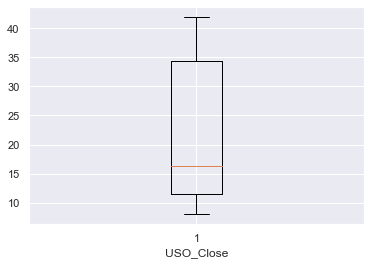

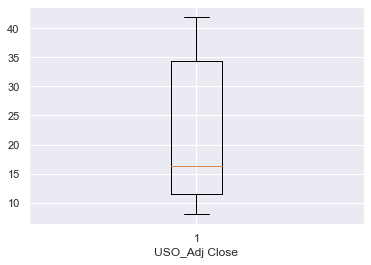

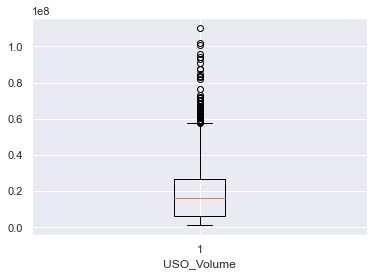

In [21]:
for col in df.columns:
    plt.boxplot(df[col])
    plt.xlabel(col)
    plt.show()

In [22]:
outlierCol = ['Open','High','Low','Close','Adj Close','Volume','SP_volume','DJ_volume',
'EG_open','EG_high','EG_low','EG_close','EG_Ajclose','EG_volume','OF_Volume','SF_Price',
'SF_Open','SF_High','SF_Low','SF_Volume','PLD_Price','PLD_Open','PLD_High','PLD_Low',
'RHO_PRICE','USDI_Volume','GDX_Open','GDX_High','GDX_Low','GDX_Close','GDX_Adj Close',
'GDX_Volume','USO_Volume']


Le dataset contient 33 colonne avec valeurs aberrantes

In [23]:
print(f'{len(outlierCol)} colonnes du dataset contient des valeurs aberrantes')

33 colonnes du dataset contient des valeurs aberrantes


In [24]:
def valeurAberante(data):
    percentage = {}
    for col in data:
        Q1 = np.quantile(data[col],0.25)
        Q3 = np.quantile(data[col],0.75)
        IIQ = Q3 - Q1
        bornInf = Q1-1.5*IIQ
        bornSup = Q3+1.5*IIQ
        abberantVal = []
        for i in df[col]:
            if bornInf <= i <= bornSup :
                pass
            else:
                abberantVal.append(i)
                percent = len(abberantVal)*100/1718
                percentage[col] = percent
    return percentage
            

In [25]:
outlier_dict = valeurAberante(df[outlierCol])

* Tableau des pourcentage de données aberrante par colonne

In [27]:
O_dataframe = pd.DataFrame([outlier_dict])

In [28]:
O_dataframe

Open       High        Low      Close  Adj Close    Volume  SP_volume  \
0  18.975553  18.975553  18.917346  18.917346  18.917346  3.783469   2.444703   

   DJ_volume   EG_open   EG_high  ...   PLD_Low  RHO_PRICE  USDI_Volume  \
0    1.45518  4.307334  4.249127  ...  1.513388  16.821886     4.481956   

   GDX_Open   GDX_High    GDX_Low  GDX_Close  GDX_Adj Close  GDX_Volume  \
0  17.57858  17.694994  18.218859  17.811409      17.811409    3.725262   

   USO_Volume  
0    2.677532  

[1 rows x 33 columns]

* Calcule du minimum et du maximum de pourcentage des valeurs aberrante

In [ ]:
plist = list(outlier_dict.values())
minperc = min(plist)
maxperc = max(plist)